<a href="https://colab.research.google.com/github/wahyudimasdi/MSIB-Project-Showcase/blob/main/Classification%20Analysis%20for%20Data%20Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok E Studi Kasus Model Klasifikasi Data Mining (B)**

| No | Nama           | NPM         | Email                  | Partisipasi Dalam Tugas |
|----|----------------|-------------|------------------------|--------------------------|
| 1  | Abdul Muhaimin       | 2106703052   | abdul.muhaimin11@sci.ui.ac.id   | Melakukan pre-processing data dan mengerjakan analisis insight yang ketiga dan keempat                      |
| 2  | Christian Audy Samuel Tampubolon     | 2106725103   | christian.audy@sci.ui.ac.id | Melakukan pre-processing data dan menginterpretasi visualisasi                       |
| 3  | Raqi Akbar Robbani    | 2106652562   | raqi.akbar@sci.ui.ac.id| Melakukan visualisasi dari data hasil preprocessing dan membuat interpretasi terkait visualisasi tersebut                      |
| 4  | Najwa Salsabila Hakim | 2106726812   | najwa.salsabila11@sci.ui.ac.id | Membuat interpretasi  visualisasi                      |
| 5  | Bob Rahman Hakim  | 2106726763   | bob.rahman@sci.ui.ac.id| Mengerjakan interpretasi model terbaik dari Modelling                     |
| 6 | Wahyu Dimasdi Putra     | 2106704736   | wahyu.dimasdi@sci.ui.ac.id  | Melakukan pemodelan klasifikasi, menghitung akurasi diikuti checking cross validation untuk setiap model. Mencari kriteria model terbaik. Melakukan analisis insight yang pertama dan kedua.                 |


Domain Knowledge & Data Understanding:
- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara legal dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax.

Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)
- Buatlah sebuah laporan Analisa Data tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari Voyant Tools) maka jangan load local file, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di Google Colab, "Error Free", dan TIDAK
PERLU REQUEST ACCESS (bisa dibuka oleh umum/public).

Pengumpulan Studi Kasus:
- Jawaban dikirimkan via email dengan deadline submission Jum'at, 23 November 2023 Jam 18:00 WIB
email: taufik.sutanto@sci.ui.ac.id
Subject: "Studi Kasus Model klasifikasi Ganjil 2023 - Kelompok XYZ"
Isi eMail:
Nama Lengkap & NIM seluruh Anggota
Link ke Google Colab
File ipynb di attach/lampirkan di email dengan nama file : Kasus-Klasifikasi-Kelompok-XYZ.ipynb
- Pengerjaan dapat dilakukan sejak diterimanya file ini.
- Periksa "sent folder" setelah mengirimkan jawaban, yakinkan email terkirim dengan baik & attachment tidak terlupa.

In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    df = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    df = pd.read_csv(fData)

df.head()

--2023-11-24 15:15:13--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279335 (1.2M) [text/plain]
Saving to: ‘data/Data-Hoax-Mafindo.csv’

Data-Hoax-Mafindo.c 100%[===================>]   1.22M  --.-KB/s    in 0.07s   

2023-11-24 15:15:13 (16.9 MB/s) - ‘data/Data-Hoax-Mafindo.csv’ saved [1279335/1279335]



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


# Pre Processing

##Melihat info data dan mengubah tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4701 non-null   int64 
 1   label             4701 non-null   int64 
 2   tanggal           4701 non-null   object
 3   judul             4701 non-null   object
 4   narasi            4701 non-null   object
 5   nama file gambar  4701 non-null   object
dtypes: int64(2), object(4)
memory usage: 220.5+ KB


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d-%b-%y', errors='coerce')

In [ ]:
 print(df.dtypes)
 print()
 print(df.head())

ID                           int64
label                        int64
tanggal             datetime64[ns]
judul                       object
narasi                      object
nama file gambar            object
dtype: object

    ID  label    tanggal                                              judul  \
0   71      1 2020-08-17  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1 2020-07-17  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1 2020-07-13  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1 2020-07-08  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1 2020-06-24       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  
0  A caller to a radio talk show recently shared ...           71.jpg  
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png  
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png  
3  Maaf Mas2

##Tokenized

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
#mengubah semua teks dalam kolom tersebut menjadi lower case
df['judul'] = df['judul'].str.lower()
df['narasi'] = df['narasi'].str.lower()

In [ ]:
df['judul'].head()

0    pemakaian masker menyebabkan penyakit legionna...
1    instruksi gubernur jateng tentang penilangan  ...
2    foto jim rohn: jokowi adalah presiden terbaik ...
3    ini bukan politik, tapi kenyataan pak jokowi b...
4         foto kadrun kalo lihat foto ini panas dingin
Name: judul, dtype: object

In [ ]:
df['narasi'].head()

0    a caller to a radio talk show recently shared ...
1    yth.seluruh anggota grup sesuai instruksi gube...
2    jokowi adalah presiden terbaik dlm sejarah ban...
3    maaf mas2 dan mbak2, ini bukan politik, tapi k...
4          kadrun kalo lihat foto ini panas dingin . .
Name: narasi, dtype: object

In [ ]:
import string
import re #untuk regular expression

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
#remove character yang tidak diperlukan
def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace menjadi single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [ ]:
#menggunakan def sebelumnya untuk kolom judul
df['judul'] = df['judul'].apply(remove_special)
df['judul'] = df['judul'].apply(remove_number)
df['judul'] = df['judul'].apply(remove_punctuation)
df['judul'] = df['judul'].apply(remove_whitespace_LT)
df['judul'] = df['judul'].apply(remove_whitespace_multiple)
df['judul'] = df['judul'].apply(remove_singl_char)

In [ ]:
#menggunakan def sebelumnya untuk kolom narasi
df['narasi'] = df['narasi'].apply(remove_special)
df['narasi'] = df['narasi'].apply(remove_number)
df['narasi'] = df['narasi'].apply(remove_punctuation)
df['narasi'] = df['narasi'].apply(remove_whitespace_LT)
df['narasi'] = df['narasi'].apply(remove_whitespace_multiple)
df['narasi'] = df['narasi'].apply(remove_singl_char)

In [ ]:
#melakukan tokenisasi kata pada teks dalam kolom judul dan narasi menggunakan NLTK
df['tokenized_judul'] = df['judul'].apply(word_tokenize_wrapper)
df['tokenized_narasi'] = df['narasi'].apply(word_tokenize_wrapper)

In [ ]:
df[['judul','tokenized_judul']].head()

,judul,tokenized_judul
0,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg..."
1,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan..."
2,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te..."
3,ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo..."
4,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ..."


In [ ]:
df[['narasi','tokenized_narasi']].head()

,narasi,tokenized_narasi
0,caller to radio talk show recently shared th...,"[caller, to, radio, talk, show, recently, shar..."
1,ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,..."
2,jokowi adalah presiden terbaik dlm sejarah ban...,"[jokowi, adalah, presiden, terbaik, dlm, sejar..."
3,maaf mas dan mbak ini bukan politik tapi kenya...,"[maaf, mas, dan, mbak, ini, bukan, politik, ta..."
4,kadrun kalo lihat foto ini panas dingin,"[kadrun, kalo, lihat, foto, ini, panas, dingin]"


In [ ]:
data_judul = df[['judul', 'tokenized_judul']]
data_narasi = df[['narasi', 'tokenized_narasi']]

In [ ]:
data_judul.head()

,judul,tokenized_judul
0,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg..."
1,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan..."
2,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te..."
3,ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo..."
4,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ..."


In [ ]:
data_narasi.head()

,narasi,tokenized_narasi
0,caller to radio talk show recently shared th...,"[caller, to, radio, talk, show, recently, shar..."
1,ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,..."
2,jokowi adalah presiden terbaik dlm sejarah ban...,"[jokowi, adalah, presiden, terbaik, dlm, sejar..."
3,maaf mas dan mbak ini bukan politik tapi kenya...,"[maaf, mas, dan, mbak, ini, bukan, politik, ta..."
4,kadrun kalo lihat foto ini panas dingin,"[kadrun, kalo, lihat, foto, ini, panas, dingin]"


##Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopword indonesia dari NTLK library
list_stopwords = stopwords.words('indonesian')

#menambah stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

#memasukkan stopword dari sumber lain
txt_stopword = pd.read_csv("https://raw.githubusercontent.com/datascienceid/stopwords-bahasa-indonesia/master/stopwords_id_satya.txt", names= ["stopwords"], header = None)

#mencampurkan stopword dari sumber lain ke yang dari NTLK
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
data_judul['stopword_applied'] = data_judul['tokenized_judul'].apply(stopwords_removal)
data_narasi['stopword_applied'] = data_narasi['tokenized_narasi'].apply(stopwords_removal)

In [ ]:
data_judul[['tokenized_judul', 'stopword_applied']].head()

,tokenized_judul,stopword_applied
0,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg..."
1,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, penilangan, berm..."
2,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, presiden, terbaik, d..."
3,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[politik, kenyataan, jokowi, berhasil, memulan..."
4,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, lihat, foto, panas, dingin]"


In [ ]:
data_narasi[['tokenized_narasi', 'stopword_applied']].head()

,tokenized_narasi,stopword_applied
0,"[caller, to, radio, talk, show, recently, shar...","[caller, to, radio, talk, show, recently, shar..."
1,"[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,..."
2,"[jokowi, adalah, presiden, terbaik, dlm, sejar...","[jokowi, presiden, terbaik, dlm, sejarah, bang..."
3,"[maaf, mas, dan, mbak, ini, bukan, politik, ta...","[maaf, mas, mbak, politik, kenyataan, jokowi, ..."
4,"[kadrun, kalo, lihat, foto, ini, panas, dingin]","[kadrun, lihat, foto, panas, dingin]"


## Normalisasi

In [ ]:
#mengganti kata alay ke kata standar baku
kamusalay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
kamusalay[['slang', 'formal']].head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
katabaku_dict = {}

for index, row in kamusalay.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1]

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]

In [ ]:
data_judul['baku_judul'] = data_judul['stopword_applied'].apply(normalized_term)
data_narasi['baku_narasi'] = data_narasi['stopword_applied'].apply(normalized_term)

In [ ]:
data_judul[['tokenized_judul', 'stopword_applied', 'baku_judul']].head()

,tokenized_judul,stopword_applied,baku_judul
0,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg..."
1,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, penilangan, berm...","[instruksi, gubernur, jateng, penilangan, berm..."
2,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[foto, jim, rohn, jokowi, presiden, terbaik, d..."
3,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[politik, kenyataan, jokowi, berhasil, memulan...","[politik, kenyataan, jokowi, berhasil, memulan..."
4,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, lihat, foto, panas, dingin]","[foto, kadrun, lihat, foto, panas, dingin]"


In [ ]:
data_narasi[['tokenized_narasi', 'stopword_applied', 'baku_narasi']].head()

,tokenized_narasi,stopword_applied,baku_narasi
0,"[caller, to, radio, talk, show, recently, shar...","[caller, to, radio, talk, show, recently, shar...","[caller, tapi, radio, talk, show, recently, sh..."
1,"[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,..."
2,"[jokowi, adalah, presiden, terbaik, dlm, sejar...","[jokowi, presiden, terbaik, dlm, sejarah, bang...","[jokowi, presiden, terbaik, dalam, sejarah, ba..."
3,"[maaf, mas, dan, mbak, ini, bukan, politik, ta...","[maaf, mas, mbak, politik, kenyataan, jokowi, ...","[maaf, mas, mbak, politik, kenyataan, jokowi, ..."
4,"[kadrun, kalo, lihat, foto, ini, panas, dingin]","[kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]"


## Stemming

In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=224a46a9de5230c45ff558afff040a415540b49f80fe55ac3af5a3c0fb12982b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_judul['baku_judul']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for document in data_narasi['baku_narasi']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_judul['stemmed_judul'] = data_judul['baku_judul'].swifter.apply(get_stemmed_term)
data_narasi['stemmed_narasi'] = data_narasi['baku_narasi'].swifter.apply(get_stemmed_term)

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

In [ ]:
data_judul['stemmed_judul'].head()

0          [pakai, masker, sebab, sakit, legionnaires]
1    [instruksi, gubernur, jateng, tilang, masker, ...
2    [foto, jim, rohn, jokowi, presiden, baik, dala...
3    [politik, nyata, jokowi, hasil, pulang, triliu...
4           [foto, kadrun, lihat, foto, panas, dingin]
Name: stemmed_judul, dtype: object

In [ ]:
data_narasi['stemmed_narasi'].head()

0    [caller, tapi, radio, talk, show, recently, sh...
1    [ythseluruh, anggota, grup, sesuai, instruksi,...
2    [jokowi, presiden, baik, dalam, sejarah, bangs...
3    [maaf, mas, mbak, politik, nyata, jokowi, hasi...
4                 [kadrun, lihat, foto, panas, dingin]
Name: stemmed_narasi, dtype: object

##Crawling/Scrapping

In [ ]:
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install unidecode
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
import nltk
nltk.download('punkt')
Sastrawi_StopWords_id = factory.get_stop_words()
print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00
['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def cleanText(txt):
    # Hashtag Preprocessing
    # Singkat/Slang
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

In [ ]:
import pickle
if 'cleaned_judul' not in data_judul.columns:
    data_judul['cleaned_judul'] = '' # inititate kolom kosong
    for idx, post in tqdm(data_judul.iterrows()):
        data_judul.at[idx, 'cleaned_judul'] = cleanText(post.judul)
    with open(fData, 'wb') as f:
        pickle.dump(data_judul, f)
data_judul.head()

4701it [00:07, 606.18it/s]


,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul
0,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg...","[pemakaian, masker, menyebabkan, penyakit, leg...","[pakai, masker, sebab, sakit, legionnaires]",pakai masker sebab sakit legionnaires
1,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, penilangan, berm...","[instruksi, gubernur, jateng, penilangan, berm...","[instruksi, gubernur, jateng, tilang, masker, ...",instruksi gubernur jateng tilang masker muka u...
2,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[foto, jim, rohn, jokowi, presiden, terbaik, d...","[foto, jim, rohn, jokowi, presiden, baik, dala...",foto jim rohn jokowi presiden baik dlm sejarah...
3,ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[politik, kenyataan, jokowi, berhasil, memulan...","[politik, kenyataan, jokowi, berhasil, memulan...","[politik, nyata, jokowi, hasil, pulang, triliu...",politik nyata jokowi hasil pulang triliun uang...
4,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, lihat, foto, panas, dingin]","[foto, kadrun, lihat, foto, panas, dingin]","[foto, kadrun, lihat, foto, panas, dingin]",foto kadrun kalo foto panas dingin


In [ ]:
import pickle
if 'cleaned_narasi' not in data_narasi.columns:
    data_narasi['cleaned_narasi'] = '' # inititate kolom kosong
    for idx, post in tqdm(data_narasi.iterrows()):
        data_narasi.at[idx, 'cleaned_narasi'] = cleanText(post.narasi)
    with open(fData, 'wb') as f:
        pickle.dump(data_narasi, f)
data_narasi.head()

4701it [00:13, 339.39it/s]


,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi
0,caller to radio talk show recently shared th...,"[caller, to, radio, talk, show, recently, shar...","[caller, to, radio, talk, show, recently, shar...","[caller, tapi, radio, talk, show, recently, sh...","[caller, tapi, radio, talk, show, recently, sh...",caller radio talk show recently shared that hi...
1,ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,...","[ythseluruh, anggota, grup, sesuai, instruksi,...",ythseluruh anggota grup sesuai instruksi guber...
2,jokowi adalah presiden terbaik dlm sejarah ban...,"[jokowi, adalah, presiden, terbaik, dlm, sejar...","[jokowi, presiden, terbaik, dlm, sejarah, bang...","[jokowi, presiden, terbaik, dalam, sejarah, ba...","[jokowi, presiden, baik, dalam, sejarah, bangs...",jokowi presiden baik dlm sejarah bangsa indone...
3,maaf mas dan mbak ini bukan politik tapi kenya...,"[maaf, mas, dan, mbak, ini, bukan, politik, ta...","[maaf, mas, mbak, politik, kenyataan, jokowi, ...","[maaf, mas, mbak, politik, kenyataan, jokowi, ...","[maaf, mas, mbak, politik, nyata, jokowi, hasi...",maaf mas mbak politik nyata jokowi hasil pulan...
4,kadrun kalo lihat foto ini panas dingin,"[kadrun, kalo, lihat, foto, ini, panas, dingin]","[kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin]",kadrun kalo foto panas dingin


In [ ]:
data_judul.to_csv("Text_Preprocessing_notinclude_tfidf_judul.csv")
data_narasi.to_csv("Text_Preprocessing_notinclude_tfidf_narasi.csv")

In [ ]:
data_judul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   judul             4701 non-null   object
 1   tokenized_judul   4701 non-null   object
 2   stopword_applied  4701 non-null   object
 3   baku_judul        4701 non-null   object
 4   stemmed_judul     4701 non-null   object
 5   cleaned_judul     4701 non-null   object
dtypes: object(6)
memory usage: 220.5+ KB


In [ ]:
data_narasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   narasi            4701 non-null   object
 1   tokenized_narasi  4701 non-null   object
 2   stopword_applied  4701 non-null   object
 3   baku_narasi       4701 non-null   object
 4   stemmed_narasi    4701 non-null   object
 5   cleaned_narasi    4701 non-null   object
dtypes: object(6)
memory usage: 220.5+ KB


##TF-IDF

###Judul

In [ ]:
df1 = pd.read_csv("/content/Text_Preprocessing_notinclude_tfidf_judul.csv")

In [ ]:
df1.head()

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul
0,0,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'sakit', 'legionn...",pakai masker sebab sakit legionnaires
1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka u...
2,2,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden baik dlm sejarah...
3,3,ini bukan politik tapi kenyataan pak jokowi be...,"['ini', 'bukan', 'politik', 'tapi', 'kenyataan...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'nyata', 'jokowi', 'hasil', 'pulan...",politik nyata jokowi hasil pulang triliun uang...
4,4,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...",foto kadrun kalo foto panas dingin


In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df1['list_judul'] = df1['stemmed_judul'].apply(convert_text_list)

In [ ]:
def calc_TF(document):
    # menghitung jumlah suatu kata tampil dalam review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

In [ ]:
df1["TF_dict_judul"] = df1['list_judul'].apply(calc_TF)

df1["TF_dict_judul"].head()

0    {'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...
1    {'instruksi': 0.09090909090909091, 'gubernur':...
2    {'foto': 0.1, 'jim': 0.1, 'rohn': 0.1, 'jokowi...
3    {'politik': 0.1111111111111111, 'nyata': 0.111...
4    {'foto': 0.3333333333333333, 'kadrun': 0.16666...
Name: TF_dict_judul, dtype: object

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

In [ ]:
DFresult = calc_DF(df1["TF_dict_judul"])

In [ ]:
#hitung IDF
n_document = len(df1)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

In [ ]:
#disimpan di idf dictionary
IDFresult = calc_IDF(n_document, DFresult)

In [ ]:
#hitung TD-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFresult[key]
    return TF_IDF_Dict

In [ ]:
df1["TF-IDF_dict_judul"] = df1["TF_dict_judul"].apply(calc_TF_IDF)

In [ ]:
#menginput kata positif dan negatif untuk menentukan jika suatu input berstatus positif, negatif, atau neutral

positive_word = pd.read_csv('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt')
negative_word = pd.read_csv('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt')
kata_positive = positive_word['a+'].tolist()
kata_negative = negative_word['abnormal'].tolist()

In [ ]:
#hitung TF-IDF untuk kata positif
def calc_positive(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_positive:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
#hitung TF-IDF untuk kata negatif
def calc_negative(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_negative:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
df1["TF-IDF_positive_judul"] = df1["TF-IDF_dict_judul"].apply(calc_positive)
df1["TF-IDF_negative_judul"] = df1["TF-IDF_dict_judul"].apply(calc_negative)

In [ ]:
conditions = [
    (df1['TF-IDF_positive_judul'] < df1['TF-IDF_negative_judul']),
    (df1['TF-IDF_positive_judul'] > df1['TF-IDF_negative_judul']),
    (df1['TF-IDF_positive_judul'] == df1['TF-IDF_negative_judul'])]
choices = ['negative','positive','neutral']

df1['status_judul'] = np.select(conditions, choices)

In [ ]:
df1.head()

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul,list_judul,TF_dict_judul,TF-IDF_dict_judul,TF-IDF_positive_judul,TF-IDF_negative_judul,status_judul
0,0,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'sakit', 'legionn...",pakai masker sebab sakit legionnaires,"[pakai, masker, sebab, sakit, legionnaires]","{'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",0.000000,0.900857,negative
1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka u...,"[instruksi, gubernur, jateng, tilang, masker, ...","{'instruksi': 0.09090909090909091, 'gubernur':...","{'instruksi': 0.6223720562354573, 'gubernur': ...",0.000000,0.000000,neutral
2,2,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden baik dlm sejarah...,"[foto, jim, rohn, jokowi, presiden, baik, dala...","{'foto': 0.1, 'jim': 0.1, 'rohn': 0.1, 'jokowi...","{'foto': 0.256665257269125, 'jim': 0.735691824...",0.605764,0.000000,positive
3,3,ini bukan politik tapi kenyataan pak jokowi be...,"['ini', 'bukan', 'politik', 'tapi', 'kenyataan...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'nyata', 'jokowi', 'hasil', 'pulan...",politik nyata jokowi hasil pulang triliun uang...,"[politik, nyata, jokowi, hasil, pulang, triliu...","{'politik': 0.1111111111111111, 'nyata': 0.111...","{'politik': 0.63860892554688, 'nyata': 0.48273...",0.000000,0.000000,neutral
4,4,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...",foto kadrun kalo foto panas dingin,"[foto, kadrun, lihat, foto, panas, dingin]","{'foto': 0.3333333333333333, 'kadrun': 0.16666...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",0.909966,2.050982,negative


In [ ]:
# Merging based on 'judul' and 'id_judul' columns
df1 = pd.merge(df1, df[['judul', 'label']], left_on='judul', right_on='judul', how='left')

# Rename the columns for clarity
df1 = df1.rename(columns={'label_x': 'label'})

# Display the merged DataFrame
df1.head()

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul,list_judul,TF_dict_judul,TF-IDF_dict_judul,TF-IDF_positive_judul,TF-IDF_negative_judul,status_judul,label
0,0,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'sakit', 'legionn...",pakai masker sebab sakit legionnaires,"[pakai, masker, sebab, sakit, legionnaires]","{'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",0.000000,0.900857,negative,1
1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka u...,"[instruksi, gubernur, jateng, tilang, masker, ...","{'instruksi': 0.09090909090909091, 'gubernur':...","{'instruksi': 0.6223720562354573, 'gubernur': ...",0.000000,0.000000,neutral,1
2,2,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden baik dlm sejarah...,"[foto, jim, rohn, jokowi, presiden, baik, dala...","{'foto': 0.1, 'jim': 0.1, 'rohn': 0.1, 'jokowi...","{'foto': 0.256665257269125, 'jim': 0.735691824...",0.605764,0.000000,positive,1
3,3,ini bukan politik tapi kenyataan pak jokowi be...,"['ini', 'bukan', 'politik', 'tapi', 'kenyataan...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'nyata', 'jokowi', 'hasil', 'pulan...",politik nyata jokowi hasil pulang triliun uang...,"[politik, nyata, jokowi, hasil, pulang, triliu...","{'politik': 0.1111111111111111, 'nyata': 0.111...","{'politik': 0.63860892554688, 'nyata': 0.48273...",0.000000,0.000000,neutral,1
4,4,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...",foto kadrun kalo foto panas dingin,"[foto, kadrun, lihat, foto, panas, dingin]","{'foto': 0.3333333333333333, 'kadrun': 0.16666...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",0.909966,2.050982,negative,1


In [ ]:
#untuk data pada kolom judul dengan label=1
df1_hoak=df1[df1['label']==1]
df1_hoak

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul,list_judul,TF_dict_judul,TF-IDF_dict_judul,TF-IDF_positive_judul,TF-IDF_negative_judul,status_judul,label
0,0,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'sakit', 'legionn...",pakai masker sebab sakit legionnaires,"[pakai, masker, sebab, sakit, legionnaires]","{'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",0.000000,0.900857,negative,1
1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka u...,"[instruksi, gubernur, jateng, tilang, masker, ...","{'instruksi': 0.09090909090909091, 'gubernur':...","{'instruksi': 0.6223720562354573, 'gubernur': ...",0.000000,0.000000,neutral,1
2,2,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden baik dlm sejarah...,"[foto, jim, rohn, jokowi, presiden, baik, dala...","{'foto': 0.1, 'jim': 0.1, 'rohn': 0.1, 'jokowi...","{'foto': 0.256665257269125, 'jim': 0.735691824...",0.605764,0.000000,positive,1
3,3,ini bukan politik tapi kenyataan pak jokowi be...,"['ini', 'bukan', 'politik', 'tapi', 'kenyataan...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'nyata', 'jokowi', 'hasil', 'pulan...",politik nyata jokowi hasil pulang triliun uang...,"[politik, nyata, jokowi, hasil, pulang, triliu...","{'politik': 0.1111111111111111, 'nyata': 0.111...","{'politik': 0.63860892554688, 'nyata': 0.48273...",0.000000,0.000000,neutral,1
4,4,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...",foto kadrun kalo foto panas dingin,"[foto, kadrun, lihat, foto, panas, dingin]","{'foto': 0.3333333333333333, 'kadrun': 0.16666...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",0.909966,2.050982,negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,4695,tulisan partai komunis indonesia gambar senapa...,"['tulisan', 'partai', 'komunis', 'indonesia', ...","['tulisan', 'partai', 'komunis', 'indonesia', ...","['tulisan', 'partai', 'komunis', 'indonesia', ...","['tulis', 'partai', 'komunis', 'indonesia', 'g...",tulis partai komunis indonesia gambar senapan ...,"[tulis, partai, komunis, indonesia, gambar, se...","{'tulis': 0.1111111111111111, 'partai': 0.1111...","{'tulis': 0.47398619877752274, 'partai': 0.606...",0.000000,0.000000,neutral,1
4743,4697,erdogan tak mau duduk di kursi tamu yang lebih...,"['erdogan', 'tak', 'mau', 'duduk', 'di', 'kurs...","['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...","['erdogan', 'duduk', 'kursi', 'tamu', 'kursi',...",erdogan duduk kursi tamu kursi baba vatikan,"[erdogan, duduk, kursi, tamu, kursi, baba, vat...","{'erdogan': 0.14285714285714285, 'duduk': 0.14...","{'erdogan': 0.8529462687480185, 'duduk': 0.852...",0.000000,0.000000,neutral,1
4744,4698,imigran china sengaja membawa virus tujuannya ...,"['imigran', 'china', 'sengaja', 'membawa', 'vi...","['imigran', 'china', 'sengaja', 'membawa', 'vi...","['imigran', 'china', 'sengaja', 'membawa', 'vi...","['imigran', 'china', 'sengaja', 'bawa', 'virus...",imigran china sengaja bawa virus tuju ba

In [ ]:
#untuk data pada kolom judul dengan label=0
df1_tidak=df1[df1['label']==0]
df1_tidak

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul,list_judul,TF_dict_judul,TF-IDF_dict_judul,TF-IDF_positive_judul,TF-IDF_negative_judul,status_judul,label
19,19,sandi sarankan warga ngadu ke kelurahan saja,"['sandi', 'sarankan', 'warga', 'ngadu', 'ke', ...","['sandi', 'sarankan', 'warga', 'ngadu', 'kelur...","['sandi', 'sarankan', 'warga', 'mengadu', 'kel...","['sandi', 'saran', 'warga', 'adu', 'lurah']",sandi saran warga ngadu lurah,"[sandi, saran, warga, adu, lurah]","{'sandi': 0.2, 'saran': 0.2, 'warga': 0.2, 'ad...","{'sandi': 1.055495340135237, 'saran': 1.301924...",0.000000,0.000000,neutral,0
21,21,irina istri ahli it hermansyah disebut mantan psk,"['irina', 'istri', 'ahli', 'it', 'hermansyah',...","['irina', 'istri', 'ahli', 'it', 'hermansyah',...","['irina', 'istri', 'ahli', 'itu', 'hermansyah'...","['irina', 'istri', 'ahli', 'itu', 'hermansyah'...",irina istri ahli hermansyah mantan psk,"[irina, istri, ahli, itu, hermansyah, mantan, ...","{'irina': 0.14285714285714285, 'istri': 0.1428...","{'irina': 1.1089119072091693, 'istri': 0.74809...",0.951967,0.000000,positive,0
22,22,nezar patria adalah kader pki ikut rapat setia...,"['nezar', 'patria', 'adalah', 'kader', 'pki', ...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...",nezar patria kader pki rapat malam istana jam ...,"[nezar, patria, kader, pki, rapat, malam, ista...","{'nezar': 0.08333333333333333, 'patria': 0.083...","{'nezar': 0.6468652792053488, 'patria': 0.6468...",0.000000,0.000000,neutral,0
55,55,coach indra sjafri saya pernah tahun tak digaj...,"['coach', 'indra', 'sjafri', 'saya', 'pernah',...","['coach', 'indra', 'sjafri', 'digaji', 'ikhlas']","['coach', 'indra', 'sjafri', 'digaji', 'ikhlas']","['coach', 'indra', 'sjafri', 'gaji', 'ikhlas']",coach indra sjafri tahun gaji ikhlas,"[coach, indra, sjafri, gaji, ikhlas]","{'coach': 0.2, 'indra': 0.2, 'sjafri': 0.2, 'g...","{'coach': 1.5524766700928372, 'indra': 1.47138...",0.000000,0.000000,neutral,0
58,58,kronologis polisi berondong sedan terobos razi...,"['kronologis', 'polisi', 'berondong', 'sedan',...","['kronologis', 'polisi', 'berondong', 'sedan',...","['kronologis', 'polisi', 'berondong', 'sedan',...","['kronologis', 'polisi', 'berondong', 'sedan',...",kronologis polisi berondong sedan terobos razi...,"[kronologis, polisi, berondong, sedan, terobos...","{'kronologis': 0.14285714285714285, 'polisi': ...","{'kronologis': 1.0509883203365744, 'polisi': 0...",0.000000,0.000000,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,4682,bareskrim tangkap pelaku ujaran kebencian mela...,"['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'laku', 'ujar', 'benc...",bareskrim tangkap laku ujar benci facebook,"[bareskrim, tangkap, laku, ujar, benci, facebook]","{'bareskrim': 0.16666666666666666, 'tangkap': ...","{'bareskrim': 1.1782060283173732, 'tangkap': 0...",0.000000,1.009606,negative,0
4731,4685,klarifikasi kepala sdn ciumbuleuit tutup foto ...,"['klarifikasi', 'kepala', 'sdn', 'ciumbuleuit'...","['klarifikasi', 'kepala', 'sdn', 'ciumbuleuit'...","['klarifikasi', 'kepala', 'sdn', 'ciumbuleuit'...","['klarifikasi', 'kepala', 'sdn', 'ciumbuleuit'...",klarifikasi kepala sdn ciumbuleuit tutup foto ...,"[klarifikasi, kepala, sdn, ciumbuleuit, tutup,...","{'klarifikasi': 0.1111111111111111, 'kepala': ...","{'klarifikasi': 0.38807621119602476, 'kepala':...",0.000000,0.000000,neutral,0
4738,4692,petugas pintu tol bekasi tolak transaksi uang ...,"['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['tugas', 'pintu', 'tol', 'bekas', 'tolak', 't...",tugas pintu tol bekas tolak transaksi uang tunai,"[tugas, pintu, tol, bekas,

In [ ]:
#menyimpan data dari judul
df1.to_csv("Text_Preprocessing_judul_complete.csv")
df1_hoak.to_csv("Text_Preprocessing_judulhoak_complete.csv")
df1_tidak.to_csv("Text_Preprocessing_judultidak_complete.csv")

###Narasi

In [ ]:
df2 = pd.read_csv("/content/Text_Preprocessing_notinclude_tfidf_narasi.csv")

In [ ]:
df2.head()

,Unnamed: 0,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi
0,0,caller to radio talk show recently shared th...,"['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...",caller radio talk show recently shared that hi...
1,1,ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...",ythseluruh anggota grup sesuai instruksi guber...
2,2,jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'adalah', 'presiden', 'terbaik', 'd...","['jokowi', 'presiden', 'terbaik', 'dlm', 'seja...","['jokowi', 'presiden', 'terbaik', 'dalam', 'se...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar...",jokowi presiden baik dlm sejarah bangsa indone...
3,3,maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'dan', 'mbak', 'ini', 'bukan',...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...",maaf mas mbak politik nyata jokowi hasil pulan...
4,4,kadrun kalo lihat foto ini panas dingin,"['kadrun', 'kalo', 'lihat', 'foto', 'ini', 'pa...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']",kadrun kalo foto panas dingin


In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df2['list_narasi'] = df2['stemmed_narasi'].apply(convert_text_list)

In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

In [ ]:
df2["TF_dict_narasi"] = df2['list_narasi'].apply(calc_TF)

df2["TF_dict_narasi"].head()

0    {'caller': 0.0125, 'tapi': 0.0375, 'radio': 0....
1    {'ythseluruh': 0.06666666666666667, 'anggota':...
2    {'jokowi': 0.08333333333333333, 'presiden': 0....
3    {'maaf': 0.013513513513513514, 'mas': 0.013513...
4    {'kadrun': 0.2, 'lihat': 0.2, 'foto': 0.2, 'pa...
Name: TF_dict_narasi, dtype: object

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

In [ ]:
DFresult = calc_DF(df2["TF_dict_narasi"])

In [ ]:
n_document = len(df2)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

In [ ]:
IDFresult = calc_IDF(n_document, DFresult)

In [ ]:
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDFresult[key]
    return TF_IDF_Dict

In [ ]:
df2["TF-IDF_dict_narasi"] = df2["TF_dict_narasi"].apply(calc_TF_IDF)

In [ ]:
positive_word = pd.read_csv('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt')
negative_word = pd.read_csv('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt')
kata_positive = positive_word['a+'].tolist()
kata_negative = negative_word['abnormal'].tolist()

In [ ]:
def calc_positive(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_positive:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
def calc_negative(TF_IDF_Dict):
  total = 0
  for key in TF_IDF_Dict:
    if key in kata_negative:
      total = total + TF_IDF_Dict[key]

  return total

In [ ]:
df2["TF-IDF_positive_narasi"] = df2["TF-IDF_dict_narasi"].apply(calc_positive)
df2["TF-IDF_negative_narasi"] = df2["TF-IDF_dict_narasi"].apply(calc_negative)

In [ ]:
conditions = [
    (df2['TF-IDF_positive_narasi'] < df2['TF-IDF_negative_narasi']),
    (df2['TF-IDF_positive_narasi'] > df2['TF-IDF_negative_narasi']),
    (df2['TF-IDF_positive_narasi'] == df2['TF-IDF_negative_narasi'])]
choices = ['negative','positive','neutral']

df2['status_narasi'] = np.select(conditions, choices)

In [ ]:
df2.head()

,Unnamed: 0,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi,list_narasi,TF_dict_narasi,TF-IDF_dict_narasi,TF-IDF_positive_narasi,TF-IDF_negative_narasi,status_narasi
0,0,caller to radio talk show recently shared th...,"['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...",caller radio talk show recently shared that hi...,"[caller, tapi, radio, talk, show, recently, sh...","{'caller': 0.0125, 'tapi': 0.0375, 'radio': 0....","{'caller': 0.09702979188080232, 'tapi': 0.1467...",0.000000,0.000000,neutral
1,1,ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...",ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,...","{'ythseluruh': 0.06666666666666667, 'anggota':...","{'ythseluruh': 0.49046121615706806, 'anggota':...",0.599205,0.000000,positive
2,2,jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'adalah', 'presiden', 'terbaik', 'd...","['jokowi', 'presiden', 'terbaik', 'dlm', 'seja...","['jokowi', 'presiden', 'terbaik', 'dalam', 'se...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar...",jokowi presiden baik dlm sejarah bangsa indone...,"[jokowi, presiden, baik, dalam, sejarah, bangs...","{'jokowi': 0.08333333333333333, 'presiden': 0....","{'jokowi': 0.2359594187363993, 'presiden': 0.2...",0.821528,0.000000,positive
3,3,maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'dan', 'mbak', 'ini', 'bukan',...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...",maaf mas mbak politik nyata jokowi hasil pulan...,"[maaf, mas, mbak, politik, nyata, jokowi, hasi...","{'maaf': 0.013513513513513514, 'mas': 0.013513...","{'maaf': 0.06035873627648455, 'mas': 0.0713172...",0.285435,0.268070,positive
4,4,kadrun kalo lihat foto ini panas dingin,"['kadrun', 'kalo', 'lihat', 'foto', 'ini', 'pa...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']",kadrun kalo foto panas dingin,"[kadrun, lihat, foto, panas, dingin]","{'kadrun': 0.2, 'lihat': 0.2, 'foto': 0.2, 'pa...","{'kadrun': 1.149496065984384, 'lihat': 0.79337...",0.980036,2.158153,negative


In [ ]:
# Merging based on 'judul' and 'id_judul' columns
df2 = pd.merge(df2, df[['narasi', 'label']], left_on='narasi', right_on='narasi', how='left')

# Rename the columns for clarity
df2 = df2.rename(columns={'label_x': 'label'})

# Display the merged DataFrame
df2.head()

,Unnamed: 0,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi,list_narasi,TF_dict_narasi,TF-IDF_dict_narasi,TF-IDF_positive_narasi,TF-IDF_negative_narasi,status_narasi,label
0,0,caller to radio talk show recently shared th...,"['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...",caller radio talk show recently shared that hi...,"[caller, tapi, radio, talk, show, recently, sh...","{'caller': 0.0125, 'tapi': 0.0375, 'radio': 0....","{'caller': 0.09702979188080232, 'tapi': 0.1467...",0.000000,0.000000,neutral,1.0
1,1,ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...",ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,...","{'ythseluruh': 0.06666666666666667, 'anggota':...","{'ythseluruh': 0.49046121615706806, 'anggota':...",0.599205,0.000000,positive,1.0
2,2,jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'adalah', 'presiden', 'terbaik', 'd...","['jokowi', 'presiden', 'terbaik', 'dlm', 'seja...","['jokowi', 'presiden', 'terbaik', 'dalam', 'se...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar...",jokowi presiden baik dlm sejarah bangsa indone...,"[jokowi, presiden, baik, dalam, sejarah, bangs...","{'jokowi': 0.08333333333333333, 'presiden': 0....","{'jokowi': 0.2359594187363993, 'presiden': 0.2...",0.821528,0.000000,positive,1.0
3,3,maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'dan', 'mbak', 'ini', 'bukan',...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...",maaf mas mbak politik nyata jokowi hasil pulan...,"[maaf, mas, mbak, politik, nyata, jokowi, hasi...","{'maaf': 0.013513513513513514, 'mas': 0.013513...","{'maaf': 0.06035873627648455, 'mas': 0.0713172...",0.285435,0.268070,positive,1.0
4,4,kadrun kalo lihat foto ini panas dingin,"['kadrun', 'kalo', 'lihat', 'foto', 'ini', 'pa...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']",kadrun kalo foto panas dingin,"[kadrun, lihat, foto, panas, dingin]","{'kadrun': 0.2, 'lihat': 0.2, 'foto': 0.2, 'pa...","{'kadrun': 1.149496065984384, 'lihat': 0.79337...",0.980036,2.158153,negative,1.0


In [ ]:
#untuk data pada kolom narasi dengan label=1
df2_hoak=df2[df2['label']==1]
df2_hoak

,Unnamed: 0,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi,list_narasi,TF_dict_narasi,TF-IDF_dict_narasi,TF-IDF_positive_narasi,TF-IDF_negative_narasi,status_narasi,label
0,0,caller to radio talk show recently shared th...,"['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'to', 'radio', 'talk', 'show', 'rec...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...","['caller', 'tapi', 'radio', 'talk', 'show', 'r...",caller radio talk show recently shared that hi...,"[caller, tapi, radio, talk, show, recently, sh...","{'caller': 0.0125, 'tapi': 0.0375, 'radio': 0....","{'caller': 0.09702979188080232, 'tapi': 0.1467...",0.000000,0.000000,neutral,1.0
1,1,ythseluruh anggota grup sesuai instruksi guber...,"['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...","['ythseluruh', 'anggota', 'grup', 'sesuai', 'i...",ythseluruh anggota grup sesuai instruksi guber...,"[ythseluruh, anggota, grup, sesuai, instruksi,...","{'ythseluruh': 0.06666666666666667, 'anggota':...","{'ythseluruh': 0.49046121615706806, 'anggota':...",0.599205,0.000000,positive,1.0
2,2,jokowi adalah presiden terbaik dlm sejarah ban...,"['jokowi', 'adalah', 'presiden', 'terbaik', 'd...","['jokowi', 'presiden', 'terbaik', 'dlm', 'seja...","['jokowi', 'presiden', 'terbaik', 'dalam', 'se...","['jokowi', 'presiden', 'baik', 'dalam', 'sejar...",jokowi presiden baik dlm sejarah bangsa indone...,"[jokowi, presiden, baik, dalam, sejarah, bangs...","{'jokowi': 0.08333333333333333, 'presiden': 0....","{'jokowi': 0.2359594187363993, 'presiden': 0.2...",0.821528,0.000000,positive,1.0
3,3,maaf mas dan mbak ini bukan politik tapi kenya...,"['maaf', 'mas', 'dan', 'mbak', 'ini', 'bukan',...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'kenyataan'...","['maaf', 'mas', 'mbak', 'politik', 'nyata', 'j...",maaf mas mbak politik nyata jokowi hasil pulan...,"[maaf, mas, mbak, politik, nyata, jokowi, hasi...","{'maaf': 0.013513513513513514, 'mas': 0.013513...","{'maaf': 0.06035873627648455, 'mas': 0.0713172...",0.285435,0.268070,positive,1.0
4,4,kadrun kalo lihat foto ini panas dingin,"['kadrun', 'kalo', 'lihat', 'foto', 'ini', 'pa...","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']","['kadrun', 'lihat', 'foto', 'panas', 'dingin']",kadrun kalo foto panas dingin,"[kadrun, lihat, foto, panas, dingin]","{'kadrun': 0.2, 'lihat': 0.2, 'foto': 0.2, 'pa...","{'kadrun': 1.149496065984384, 'lihat': 0.79337...",0.980036,2.158153,negative,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,4695,jangan beranggapan indonesia sejak pimpin jok...,"['jangan', 'beranggapan', 'indonesia', 'sejak'...","['beranggapan', 'indonesia', 'pimpin', 'jokowi']","['beranggapan', 'indonesia', 'pimpin', 'jokowi']","['anggap', 'indonesia', 'pimpin', 'jokowi']",anggap indonesia pimpin jokowi,"[anggap, indonesia, pimpin, jokowi]","{'anggap': 0.25, 'indonesia': 0.25, 'pimpin': ...","{'anggap': 1.2111531545949765, 'indonesia': 0....",0.000000,0.000000,neutral,1.0
4813,4697,erdogan datang ke vatikan menjumpai baba pop v...,"['erdogan', 'datang', 'ke', 'vatikan', 'menjum...","['erdogan', 'vatikan', 'menjumpai', 'baba', 'p...","['erdogan', 'vatikan', 'menjumpai', 'baba', 'p...","['erdogan', 'vatikan', 'jumpa', 'baba', 'pop',...",erdogan vatikan jumpa baba pop vatikan kursi t...,"[erdogan, vatikan, jumpa, baba, pop, vatikan, ...","{'erdogan': 0.09523809523809523, 'vatikan': 0....","{'erdogan': 0.5859948036219128, 'vatikan': 0.3...",0.000000,0.000000,neutral,1.0
4814,4698,imigran cn sengaja membawa virus dan mereka te...,"['imigran', 'cn', 'sengaja', 'membawa', 'virus...","['imigran', 'cn', 'sengaja', 'membawa', 'virus...","['imigran', 'cn', 'sengaja', 'membawa', 'virus...","['imigran', 'cn', 'sengaja', 'bawa', 'virus', ...",imigran sengaja bawa virus sunti anti bodi tub...,"[imigran

In [ ]:
#untuk data pada kolom narasi dengan label=0
df2_tidak=df2[df2['label']==0]
df2_tidak

,Unnamed: 0,narasi,tokenized_narasi,stopword_applied,baku_narasi,stemmed_narasi,cleaned_narasi,list_narasi,TF_dict_narasi,TF-IDF_dict_narasi,TF-IDF_positive_narasi,TF-IDF_negative_narasi,status_narasi,label
19,19,astaga sandiaga sarankan warga ngadu ke kelura...,"['astaga', 'sandiaga', 'sarankan', 'warga', 'n...","['astaga', 'sandiaga', 'sarankan', 'warga', 'n...","['astaga', 'sandiaga', 'sarankan', 'warga', 'm...","['astaga', 'sandiaga', 'saran', 'warga', 'adu'...",astaga sandiaga saran warga ngadu lurah balai ...,"[astaga, sandiaga, saran, warga, adu, lurah, b...","{'astaga': 0.125, 'sandiaga': 0.125, 'saran': ...","{'astaga': 0.9196147802945026, 'sandiaga': 0.7...",0.000000,0.000000,neutral,0.0
21,21,irina istri ahli it hermansyah disebut mantan psk,"['irina', 'istri', 'ahli', 'it', 'hermansyah',...","['irina', 'istri', 'ahli', 'it', 'hermansyah',...","['irina', 'istri', 'ahli', 'itu', 'hermansyah'...","['irina', 'istri', 'ahli', 'itu', 'hermansyah'...",irina istri ahli hermansyah mantan psk,"[irina, istri, ahli, itu, hermansyah, mantan, ...","{'irina': 0.14285714285714285, 'istri': 0.1428...","{'irina': 1.1089119072091693, 'istri': 0.68095...",0.760005,0.000000,positive,0.0
22,22,nezar patria adalah kader pki ikut rapat setia...,"['nezar', 'patria', 'adalah', 'kader', 'pki', ...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...","['nezar', 'patria', 'kader', 'pki', 'rapat', '...",nezar patria kader pki rapat malam istana jam ...,"[nezar, patria, kader, pki, rapat, malam, ista...","{'nezar': 0.08333333333333333, 'patria': 0.083...","{'nezar': 0.6468652792053488, 'patria': 0.6130...",0.000000,0.000000,neutral,0.0
57,55,kendati sukses mengantarkan timnas indonesia ...,"['kendati', 'sukses', 'mengantarkan', 'timnas'...","['kendati', 'sukses', 'mengantarkan', 'timnas'...","['kendati', 'sukses', 'mengantarkan', 'timnas'...","['kendati', 'sukses', 'antar', 'timnas', 'indo...",kendati sukses antar timnas indonesia juara pi...,"[kendati, sukses, antar, timnas, indonesia, ju...","{'kendati': 0.07692307692307693, 'sukses': 0.0...","{'kendati': 0.5971064115741681, 'sukses': 0.47...",2.087501,0.000000,positive,0.0
60,58,innalillah hanya karena lalai terobos razia mo...,"['innalillah', 'hanya', 'karena', 'lalai', 'te...","['innalillah', 'lalai', 'terobos', 'razia', 'm...","['innalillah', 'lalai', 'terobos', 'razia', 'm...","['innalillah', 'lalai', 'terobos', 'razia', 'm...",innalillah lalai terobos razia mobil isi kelua...,"[innalillah, lalai, terobos, razia, mobil, isi...","{'innalillah': 0.09090909090909091, 'lalai': 0...","{'innalillah': 0.6426578336276582, 'lalai': 0....",0.000000,0.642658,negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4682,bareskrim tangkap pelaku ujaran kebencian mela...,"['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'pelaku', 'ujaran', '...","['bareskrim', 'tangkap', 'laku', 'ujar', 'benc...",bareskrim tangkap laku ujar benci facebook,"[bareskrim, tangkap, laku, ujar, benci, facebook]","{'bareskrim': 0.16666666666666666, 'tangkap': ...","{'bareskrim': 1.084936730328136, 'tangkap': 0....",0.000000,0.866239,negative,0.0
4801,4685,di sdn ciumbuleuit bandung ini entah mengapa f...,"['di', 'sdn', 'ciumbuleuit', 'bandung', 'ini',...","['sdn', 'ciumbuleuit', 'bandung', 'foto', 'pre...","['sdn', 'ciumbuleuit', 'bandung', 'foto', 'pre...","['sdn', 'ciumbuleuit', 'bandung', 'foto', 'pre...",sdn ciumbuleuit bandung foto presiden wakil pr...,"[sdn, ciumbuleuit, bandung, foto, presiden, wa...","{'sdn': 0.02702702702702703, 'ciumbuleuit': 0....","{'sdn': 0.18502953023216298, 'ciumbuleuit': 0....",0.284437,0.336047,negative,0.0
4808,4692,petugas pintu tol bekasi tolak transaksi uang ...,"['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['petugas', 'pintu', 'tol', 'bekasi', 'tolak',...","['tugas', 'pintu', 'to

In [ ]:
df2.to_csv("Text_Preprocessing_narasi_complete.csv")
df2_hoak.to_csv("Text_Preprocessing_narasihoak_complete.csv")
df2_tidak.to_csv("Text_Preprocessing_narasitidak_complete.csv")

#VISUALISASI

##Judul

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Judul.jpeg?token=GHSAT0AAAAAACKW7RAE2QO2SOCJX5GDDXCKZLAI46Q)


Berdasarkan visualisasi di atas terlihat bahwa pada data secara keseluruhan kata yang paling sering muncul adalah video, foto, jokowi, dan indonesia. Kata video dan foto dapat berhubungan dengan beberapa topik seperti media sosial, content creating, dan lainnya. Sedangkan jokowi dan indonesia, dapat terkait dengan topik seperti negara atau masalah politik. Jika keempatnya digabung maka topik yang mungkin terkait akan berbunyi seperti "Politik di Media Sosial". Maka dapat disimpulkan dari kolom judul, baik untuk data hoax maupun bukan, topik yang paling sering muncul seperti "Media Sosial", "Politik", "Presiden", dan "Politik di Media Sosial" atau dapat juga sesederhana foto dan video yang beredar tentang suatu hal.

##Narasi

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Narasi.jpeg?token=GHSAT0AAAAAACKW7RAFH7C3KBDECRCMIT26ZLAJBDA)

Berdasarkan visualisasi di atas terlihat bahwa kata yang paling sering muncul adalah indonesia dengan perbedaan yang cukup jauh dengan kata lainnya. Kemudian diikuti oleh presdien, jokowi, jakarta, berita, covid, islam, dan china. Topik yang mungkin terkait dengan  kata-kata tersebut adalah "Presiden Indonesia", "Covid di Indonesia", "Berita Indonesia", "Islam di Indonesia", dan "Covid dari China".

##Judul pada Data Hoax

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Judul%20pada%20data%20hoax.jpeg?token=GHSAT0AAAAAACKW7RAEFB5UZ2CIRE4KQK26ZLAJB3Q)

Berdasarkan visualisasi di atas terlihat bahwa kata yang sering muncul adalah foto, video, indonesia, corona, jokowi, virus, covid, dan prabowo. Topik yang mungkin terkait dengan negara indonesia, kesehatan, politik, dan media sosial. Topik-topik tersebut merupakan topik yang sempat hangat diperbincangkan dari Tahun 2020 kemarin. Wajar jika kata-kata tersebut sering muncul.

##Judul pada Data Bukan Hoax

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Judul%20pada%20data%20bukan%20hoax.jpeg?token=GHSAT0AAAAAACKW7RAEKVP5VZPFRMPUGCZKZLAJDNQ)

Berdasarkan hasil WorkCloud  tentang judul pada berita Kominfo data bukan hoax. Kami melihat kata yang paling sering muncul adalah klarifikasi,jokowi,bantah,indonesia dan hoax. Kata klarifikasi dapat berhubungan dengan penyelasaian dari suatu masalah yang terjadi, lalu Jokowi dan Indonesia dapat terkait dengan berita topik negara, bantah dapat terkait dengan bantahan dengan berita-berita yang tidak sesuai fakta, hoax keterkaitan dengan kebohongan isu. Kami melihat bahwa topik-topik tentang kata yang diulang tersebut merupakan topik yang pada umumnya dianggap kontroversial



##Narasi pada Data Hoax

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Narasi%20pada%20data%20hoax.jpeg?token=GHSAT0AAAAAACKW7RAFWRABJIHQF4HMPPSCZLAJENA)

Berdasarkan hasil WorkCloud tentang narasi pada berita Kominfo data  hoax. Kami melihat kata yang paling sering muncul adalah Indonesia,Jokowi,corona,anak,covid, dan negara. Kata Jokowi dan Indonesia berkaitan dengan topik negara atau masalah politik, corona dan covid berkaitan dengan virus yang melanda indoneisa pada tahun 2019 yang berasal dari china, Kami melihat bahwa topik-topik tentang kata yang diulang tersebut merupakan topik yang pada umumnya dianggap kontroversial



##Narasi pada Data Bukan Hoax

![IMAGE](https://raw.githubusercontent.com/wahyudimasdi/Analisis-Model-Klasifikasi-Datmin/main/Narasi%20pada%20data%20bukan%20hoax.jpeg?token=GHSAT0AAAAAACKW7RAEQ3ZVCLCFQBJ35GAIZLAJFEA)

Berdasarkan hasil WorkCloud tentang narasi pada berita Kominfo data bukan hoax. Kami melihat beberapa kata yang menarik adalah indonesia,hoax,berita,sebar. Kami melihat bahwa topik-topik tentang kata yang diulang tersebut merupakan topik yang pada umumnya dianggap kontroversial



## Kesimpulan

Berdasarkan hasil dari voyant tools, dapat disimpulkan bahwa judul yang mencakup kata-kata seperti "Klarifikasi," "Kait," "Bantan," dan "Indonesia" cenderung memiliki konten yang bukan hoax, fokus pada penjelasan atau konteks terkait Indonesia. Sebaliknya, judul dengan kata-kata seperti "Video," "Jokowi," "Foto," "Corona," "Indonesia," "Covid," "Virus," dan "China" cenderung bersifat hoax, mungkin terkait dengan konten yang bersifat sensasional atau tidak akurat.

Secara serupa, narasi dengan kata-kata seperti "Hoax," "Indonesia," "Berita," "Sebar," "Media," dan "Edar" lebih mungkin bukan hoax, menunjukkan pembahasan tentang penyebaran berita palsu di Indonesia. Di sisi lain, narasi dengan kata-kata seperti "Indonesia," "Jokowi," "Virus," "Anak," "Covid," "Corona," "Presiden," dan "Negara" cenderung hoax, merujuk pada konten yang mungkin tidak akurat atau bersifat sensasional. Kesimpulan ini dapat membantu dalam penilaian awal terhadap kecenderungan suatu konten untuk bersifat hoax.

#MODELLING

### Model Naive Bayes

Average Cross-Validation Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.02      0.05       860
           1       0.82      1.00      0.90      3887

    accuracy                           0.82      4747
   macro avg       0.81      0.51      0.47      4747
weighted avg       0.82      0.82      0.75      4747



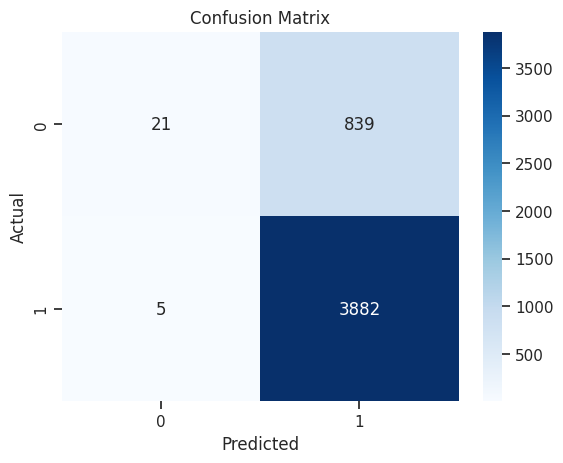

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into df1 (assuming it is loaded before this point)

# Mengganti nilai np.nan dengan string kosong
df1['cleaned_judul'].fillna('', inplace=True)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply vectorization to the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(df1['cleaned_judul'])
y = df1['label']

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform label encoding on the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform cross-validation and calculate accuracy
cv_predictions = cross_val_predict(model, X_tfidf, y_encoded, cv=kfold)
cv_accuracy = accuracy_score(y_encoded, cv_predictions)

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy: {cv_accuracy:.2f}')

# Print classification report
print('\nClassification Report:\n', classification_report(y_encoded, cv_predictions))

# Optional: Print confusion matrix
# print('\nConfusion Matrix:\n', confusion_matrix(y_encoded, cv_predictions))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(y_encoded, cv_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Average Cross-Validation Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.03      0.05       877
           1       0.82      1.00      0.90      3938
           2       0.00      0.00      0.00         2

    accuracy                           0.82      4817
   macro avg       0.52      0.34      0.32      4817
weighted avg       0.81      0.82      0.75      4817



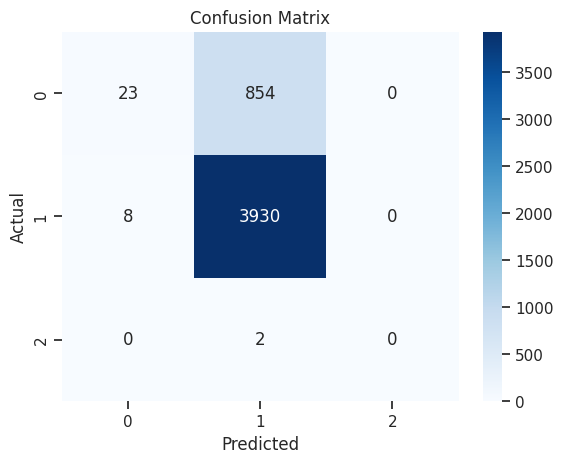

In [ ]:
# Load your data into df1 (assuming it is loaded before this point)

# Mengganti nilai np.nan dengan string kosong
df2['cleaned_narasi'].fillna('', inplace=True)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply vectorization to the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(df2['cleaned_narasi'])
y = df2['label']

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform label encoding on the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform cross-validation and calculate accuracy
cv_predictions = cross_val_predict(model, X_tfidf, y_encoded, cv=kfold)
cv_accuracy = accuracy_score(y_encoded, cv_predictions)

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy: {cv_accuracy:.2f}')

# Print classification report
print('\nClassification Report:\n', classification_report(y_encoded, cv_predictions))

# Optional: Print confusion matrix
# print('\nConfusion Matrix:\n', confusion_matrix(y_encoded, cv_predictions))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(y_encoded, cv_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Model SVM

Average Cross-Validation Accuracy (SVM): 0.85

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.75      0.29      0.42       860
           1       0.86      0.98      0.92      3887

    accuracy                           0.85      4747
   macro avg       0.81      0.64      0.67      4747
weighted avg       0.84      0.85      0.83      4747


Confusion Matrix (SVM):
 [[ 253  607]
 [  83 3804]]


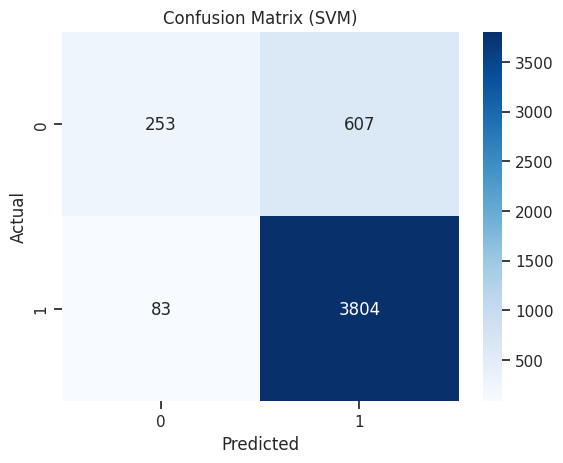

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mengganti nilai np.nan dengan nilai yang sesuai pada kolom teks
df1['cleaned_judul'].fillna('', inplace=True)

# Menghapus baris dengan nilai NaN pada kolom label
df1.dropna(subset=['label'], inplace=True)

# Pisahkan data menjadi set pelatihan dan pengujian
Xsvmj = df1['cleaned_judul']
ysvmj = df1['label']

# Inisialisasi vektorisasi Tfidf
tfidf_vectorizersvmj = TfidfVectorizer(max_features=5000, stop_words='english')

# Terapkan vektorisasi pada data teks
X_tfidfsvmj = tfidf_vectorizer.fit_transform(Xsvmj)

# Inisialisasi model klasifikasi Support Vector Machine (SVM)
svm_modelj = SVC(kernel='linear')

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfoldsvmj = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy_svmj = cross_val_score(svm_modelj, X_tfidfsvmj, ysvmj, cv=kfoldsvmj, scoring=make_scorer(accuracy_score))

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy (SVM): {cv_accuracy_svmj.mean():.2f}')

# Optional: Print other metrics if needed
cv_predictions_svmj = cross_val_predict(svm_modelj, X_tfidfsvmj, ysvmj, cv=kfoldsvmj)
print('\nClassification Report (SVM):\n', classification_report(ysvmj, cv_predictions_svmj))
print('\nConfusion Matrix (SVM):\n', confusion_matrix(ysvmj, cv_predictions_svmj))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(ysvmj, cv_predictions_svmj), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()


Average Cross-Validation Accuracy (SVM): 0.83

Classification Report (SVM):
               precision    recall  f1-score   support

         0.0       0.66      0.13      0.22       877
         1.0       0.84      0.99      0.90      3938

    accuracy                           0.83      4815
   macro avg       0.75      0.56      0.56      4815
weighted avg       0.80      0.83      0.78      4815


Confusion Matrix (SVM):
 [[ 113  764]
 [  57 3881]]


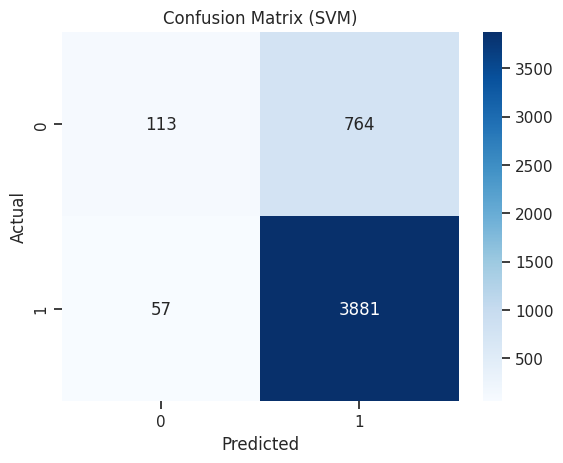

In [ ]:
# Mengganti nilai np.nan dengan nilai yang sesuai pada kolom teks
df2['cleaned_narasi'].fillna('', inplace=True)

# Menghapus baris dengan nilai NaN pada kolom label
df2.dropna(subset=['label'], inplace=True)

# Pisahkan data menjadi set pelatihan dan pengujian
X = df2['cleaned_narasi']
y = df2['label']

# Inisialisasi vektorisasi Tfidf
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Terapkan vektorisasi pada data teks
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi model klasifikasi Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy_svm = cross_val_score(svm_model, X_tfidf, y, cv=kfold, scoring=make_scorer(accuracy_score))

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy (SVM): {cv_accuracy_svm.mean():.2f}')

# Optional: Print other metrics if needed
cv_predictions_svm = cross_val_predict(svm_model, X_tfidf, y, cv=kfold)
print('\nClassification Report (SVM):\n', classification_report(y, cv_predictions_svm))
print('\nConfusion Matrix (SVM):\n', confusion_matrix(y, cv_predictions_svm))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(y, cv_predictions_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()


### Model Catboost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


0:	learn: 0.6379896	total: 71.6ms	remaining: 7.08s
1:	learn: 0.5954257	total: 92.6ms	remaining: 4.54s
2:	learn: 0.5637743	total: 116ms	remaining: 3.75s
3:	learn: 0.5345902	total: 137ms	remaining: 3.28s
4:	learn: 0.5121339	total: 159ms	remaining: 3.01s
5:	learn: 0.4940299	total: 178ms	remaining: 2.79s
6:	learn: 0.4805177	total: 198ms	remaining: 2.63s
7:	learn: 0.4680668	total: 218ms	remaining: 2.5s
8:	learn: 0.4583710	total: 238ms	remaining: 2.4s
9:	learn: 0.4483693	total: 259ms	remaining: 2.33s
10:	learn: 0.4426092	total: 284ms	remaining: 2.3s
11:	learn: 0.4366716	total: 305ms	remaining: 2.24s
12:	learn: 0.4301910	total: 337ms	remaining: 2.25s
13:	learn: 0.4261440	total: 358ms	remaining: 2.2s
14:	learn: 0.4225757	total: 378ms	remaining: 2.14s
15:	learn: 0.4189539	total: 398ms	remaining: 2.09s
16:	learn: 0.4158404	total: 418ms	remaining: 2.04s
17:	learn: 0.4135409	total: 438ms	remaining: 2s
18:	learn: 0.4116028	total: 458ms	remaining: 1.95s
19:	learn: 0.4102943	total: 539ms	remaining: 2

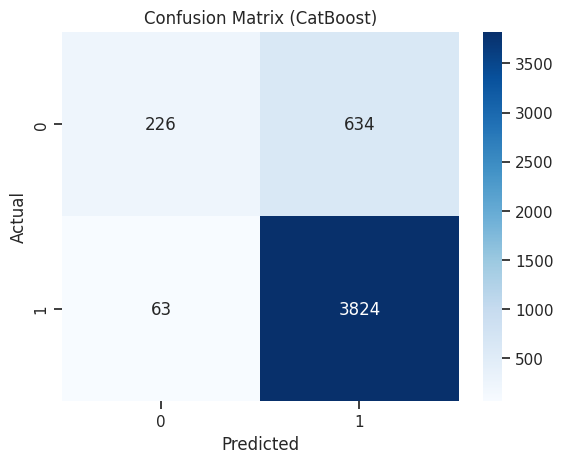

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mengganti nilai np.nan dengan nilai yang sesuai pada kolom 'cleaned_narasi'
df1['cleaned_judul'].fillna('', inplace=True)

# Menghapus baris dengan nilai NaN pada kolom 'label'
df1.dropna(subset=['label'], inplace=True)

# Pisahkan data menjadi set pelatihan dan pengujian
X = df1['cleaned_judul']
y = df1['label']

# Inisialisasi vektorisasi Tfidf
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Terapkan vektorisasi pada data teks
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi model klasifikasi CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='Logloss')

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy_catboost = cross_val_score(catboost_model, X_tfidf, y, cv=kfold, scoring=make_scorer(accuracy_score))

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy (CatBoost): {cv_accuracy_catboost.mean():.2f}')

# Optional: Print other metrics if needed
cv_predictions_catboost = cross_val_predict(catboost_model, X_tfidf, y, cv=kfold)
print('\nClassification Report (CatBoost):\n', classification_report(y, cv_predictions_catboost))
print('\nConfusion Matrix (CatBoost):\n', confusion_matrix(y, cv_predictions_catboost))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(y, cv_predictions_catboost), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (CatBoost)')
plt.show()


0:	learn: 0.6475528	total: 79.7ms	remaining: 7.89s
1:	learn: 0.6106681	total: 178ms	remaining: 8.7s
2:	learn: 0.5819516	total: 267ms	remaining: 8.62s
3:	learn: 0.5585955	total: 355ms	remaining: 8.52s
4:	learn: 0.5409568	total: 448ms	remaining: 8.52s
5:	learn: 0.5257915	total: 514ms	remaining: 8.05s
6:	learn: 0.5145851	total: 579ms	remaining: 7.69s
7:	learn: 0.5035155	total: 625ms	remaining: 7.19s
8:	learn: 0.4940250	total: 665ms	remaining: 6.72s
9:	learn: 0.4874940	total: 700ms	remaining: 6.3s
10:	learn: 0.4813485	total: 735ms	remaining: 5.95s
11:	learn: 0.4770192	total: 771ms	remaining: 5.65s
12:	learn: 0.4722182	total: 809ms	remaining: 5.42s
13:	learn: 0.4682615	total: 843ms	remaining: 5.18s
14:	learn: 0.4652169	total: 875ms	remaining: 4.96s
15:	learn: 0.4623831	total: 907ms	remaining: 4.76s
16:	learn: 0.4601957	total: 940ms	remaining: 4.59s
17:	learn: 0.4575592	total: 973ms	remaining: 4.43s
18:	learn: 0.4552292	total: 1.02s	remaining: 4.35s
19:	learn: 0.4524476	total: 1.05s	remainin

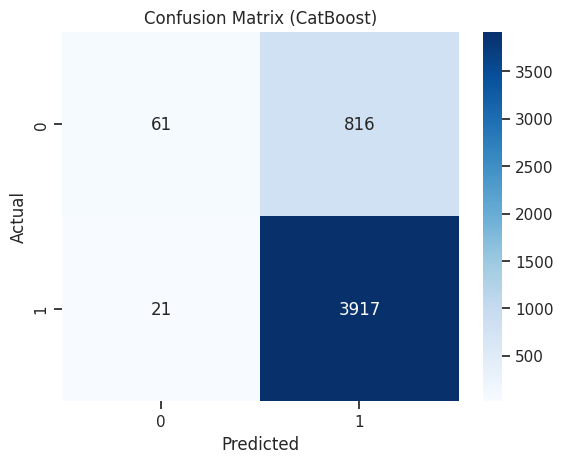

In [ ]:
# Mengganti nilai np.nan dengan nilai yang sesuai pada kolom 'cleaned_narasi'
df2['cleaned_narasi'].fillna('', inplace=True)

# Menghapus baris dengan nilai NaN pada kolom 'label'
df2.dropna(subset=['label'], inplace=True)

# Pisahkan data menjadi set pelatihan dan pengujian
X = df2['cleaned_narasi']
y = df2['label']

# Inisialisasi vektorisasi Tfidf
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Terapkan vektorisasi pada data teks
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi model klasifikasi CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='Logloss')

# Initialize StratifiedKFold with k=5 (you can change k as needed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy_catboost = cross_val_score(catboost_model, X_tfidf, y, cv=kfold, scoring=make_scorer(accuracy_score))

# Print average cross-validation accuracy
print(f'Average Cross-Validation Accuracy (CatBoost): {cv_accuracy_catboost.mean():.2f}')

# Optional: Print other metrics if needed
cv_predictions_catboost = cross_val_predict(catboost_model, X_tfidf, y, cv=kfold)
print('\nClassification Report (CatBoost):\n', classification_report(y, cv_predictions_catboost))
print('\nConfusion Matrix (CatBoost):\n', confusion_matrix(y, cv_predictions_catboost))

# Visualize the confusion matrix for one fold (you can customize as needed)
sns.heatmap(confusion_matrix(y, cv_predictions_catboost), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (CatBoost)')
plt.show()


### Interpretasi Model Terbaik
Dari beberapa model yang dihasilkan dapat dilihat bahwa  model Support Vector Machine (SVM) pertama yaitu yang kolom judulnya telah dipreprocessing, kita dapat menyimpulkan performa model sebagai berikut:

1. **Average Cross-Validation Accuacy:** Model ini mencapai nilai 0.85, menandakan bahwa akurasi rata-rata selama proses validasi silang mencapai sekitar 85%.

2. **Classification Report (SVM):**
   - **Precision:** Presisi untuk kelas 0 sebesar 0.75, sementara untuk kelas 1 sebesar 0.86. Presisi yang tinggi menandakan bahwa prediksi model cenderung akurat saat memprediksi suatu kelas.
   
   - **Recall:** Recall untuk kelas 0 hanya sebesar 0.29, sedangkan untuk kelas 1 mencapai 0.98. Tingginya recall untuk kelas 1 menunjukkan bahwa model sangat mampu mengidentifikasi kelas tersebut, tetapi recall yang rendah untuk kelas 0 menandakan kesulitan dalam mengenali kelas tersebut.
   
   - **F1-Score:** F1-score untuk kelas 0 adalah 0.42, sedangkan untuk kelas 1 mencapai 0.92. F1-score memberikan gambaran seimbang antara presisi dan recall. F1-score yang tinggi menunjukkan keseimbangan yang baik antara kedua metrik ini.

   - **Support:** Jumlah sampel yang mendukung setiap kelas adalah 860 untuk kelas 0 dan 3887 untuk kelas 1.

3. **Akurasi Umum:** Akurasi model pada keseluruhan dataset adalah 0.85 atau 85%, yang merupakan rasio prediksi yang benar dibagi dengan total sampel.

4. **Matriks Konfusi:**
   - True Positive (TP): 3804, True Negative (TN): 253
   - False Positive (FP): 607, False Negative (FN): 83

   Matriks konfusi memberikan gambaran rinci tentang kinerja model. Dari matriks ini terlihat bahwa model cenderung membuat kesalahan dalam mengenali kelas 0, sebagaimana tercermin dari jumlah False Positive yang lebih tinggi dan recall yang rendah untuk kelas 0 dalam laporan klasifikasi.

Secara keseluruhan, model SVM ini efektif dalam mengidentifikasi kelas mayoritas (kelas 1), namun menghadapi kendala dalam mengenali kelas minoritas (kelas 0). Diperlukan fokus khusus pada kelas minoritas untuk meningkatkan keseimbangan kinerja model.

# INSIGHT

## Insight 1

Kali ini akan dilakukan analisis lebih lanjut dari model terbaik yang kita dapat. Dalam hal ini model terbaik yang diambil berdasarkan akurasi model terbesar dengan pertimbangan F1 score yaitu model SVM berdasarkan Judul berita. Dalam hal ini akan dilihat kelompok yang diprediksi hoax dan memang aslinya berita hoax dan akan dilakukan analisis lebih lanjut menggunakan hasil sentiment analysis

In [ ]:
# Extract data corresponding to true positives (1,1) in confusion matrix
true_positives_data = df1.loc[(ysvmj == 1) & (cv_predictions_svmj == 1)]
# Create a new DataFrame
df_true_positives = pd.DataFrame(true_positives_data)
# Display the new DataFrame
print(df_true_positives.info())
df_true_positives.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 4746
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3804 non-null   int64  
 1   judul                  3804 non-null   object 
 2   tokenized_judul        3804 non-null   object 
 3   stopword_applied       3804 non-null   object 
 4   baku_judul             3804 non-null   object 
 5   stemmed_judul          3804 non-null   object 
 6   cleaned_judul          3804 non-null   object 
 7   list_judul             3804 non-null   object 
 8   TF_dict_judul          3804 non-null   object 
 9   TF-IDF_dict_judul      3804 non-null   object 
 10  TF-IDF_positive_judul  3804 non-null   float64
 11  TF-IDF_negative_judul  3804 non-null   float64
 12  status_judul           3804 non-null   object 
 13  label                  3804 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 445.8+

,Unnamed: 0,judul,tokenized_judul,stopword_applied,baku_judul,stemmed_judul,cleaned_judul,list_judul,TF_dict_judul,TF-IDF_dict_judul,TF-IDF_positive_judul,TF-IDF_negative_judul,status_judul,label
0,0,pemakaian masker menyebabkan penyakit legionna...,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pemakaian', 'masker', 'menyebabkan', 'penyak...","['pakai', 'masker', 'sebab', 'sakit', 'legionn...",pakai masker sebab sakit legionnaires,"[pakai, masker, sebab, sakit, legionnaires]","{'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...","{'pakai': 0.8624791609265196, 'masker': 1.0640...",0.000000,0.900857,negative,1
1,1,instruksi gubernur jateng tentang penilangan b...,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'penilanga...","['instruksi', 'gubernur', 'jateng', 'tilang', ...",instruksi gubernur jateng tilang masker muka u...,"[instruksi, gubernur, jateng, tilang, masker, ...","{'instruksi': 0.09090909090909091, 'gubernur':...","{'instruksi': 0.6223720562354573, 'gubernur': ...",0.000000,0.000000,neutral,1
2,2,foto jim rohn jokowi adalah presiden terbaik d...,"['foto', 'jim', 'rohn', 'jokowi', 'adalah', 'p...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...","['foto', 'jim', 'rohn', 'jokowi', 'presiden', ...",foto jim rohn jokowi presiden baik dlm sejarah...,"[foto, jim, rohn, jokowi, presiden, baik, dala...","{'foto': 0.1, 'jim': 0.1, 'rohn': 0.1, 'jokowi...","{'foto': 0.256665257269125, 'jim': 0.735691824...",0.605764,0.000000,positive,1
3,3,ini bukan politik tapi kenyataan pak jokowi be...,"['ini', 'bukan', 'politik', 'tapi', 'kenyataan...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'kenyataan', 'jokowi', 'berhasil',...","['politik', 'nyata', 'jokowi', 'hasil', 'pulan...",politik nyata jokowi hasil pulang triliun uang...,"[politik, nyata, jokowi, hasil, pulang, triliu...","{'politik': 0.1111111111111111, 'nyata': 0.111...","{'politik': 0.63860892554688, 'nyata': 0.48273...",0.000000,0.000000,neutral,1
4,4,foto kadrun kalo lihat foto ini panas dingin,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...","['foto', 'kadrun', 'lihat', 'foto', 'panas', '...",foto kadrun kalo foto panas dingin,"[foto, kadrun, lihat, foto, panas, dingin]","{'foto': 0.3333333333333333, 'kadrun': 0.16666...","{'foto': 0.8555508575637498, 'kadrun': 1.04305...",0.909966,2.050982,negative,1


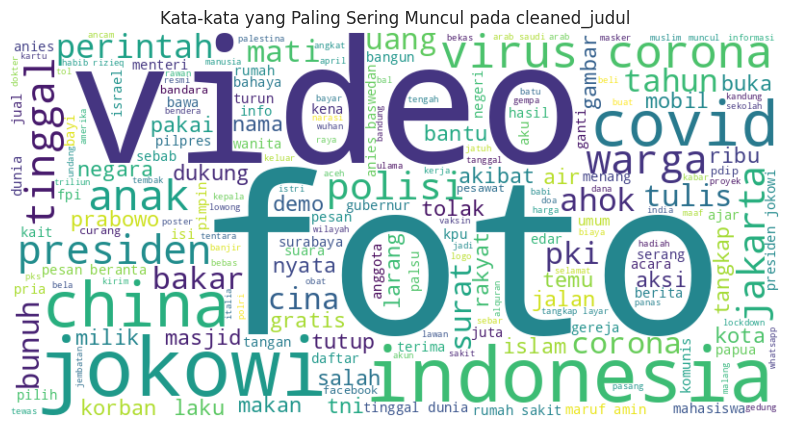

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom cleaned_judul
all_text = ' '.join(df_true_positives['cleaned_judul'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata-kata yang Paling Sering Muncul pada cleaned_judul')
plt.show()

Dari visualisasi wordcloud tersebut didapat beberapa kata yang paling sering muncul yaitu 'jokowi', 'indonesia', 'foto', 'video', 'china', dan 'covid'. Selanjutnya akan dilihat distribusi TF-IDFnya untuk dilakukan analisis lebih lanjut.

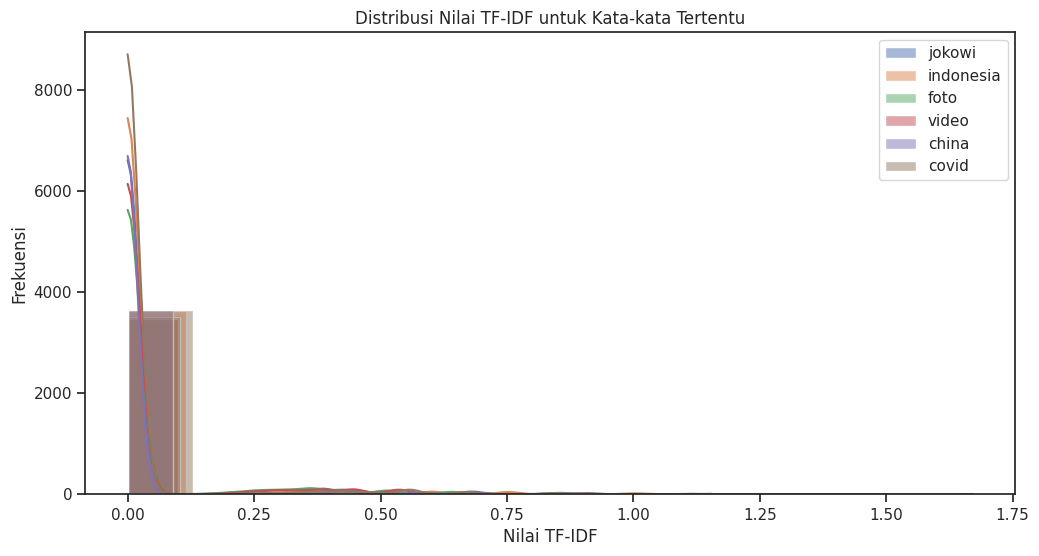

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_words = ['jokowi', 'indonesia', 'foto', 'video', 'china', 'covid']

# Inisialisasi DataFrame baru untuk menyimpan nilai TF-IDF
df_tfidf_selected_words = pd.DataFrame(index=df_true_positives.index, columns=selected_words)

# Mengisi DataFrame dengan nilai TF-IDF untuk kata-kata tertentu
for word in selected_words:
    df_tfidf_selected_words[word] = df_true_positives['TF-IDF_dict_judul'].apply(lambda x: x.get(word, 0.0))

# Membuat histogram untuk setiap kata
plt.figure(figsize=(12, 6))
for word in selected_words:
    sns.histplot(df_tfidf_selected_words[word], label=word, kde=True)

plt.title('Distribusi Nilai TF-IDF untuk Kata-kata Tertentu')
plt.xlabel('Nilai TF-IDF')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Histogram yang berkumpul pada nilai TF-IDF yang rendah (0-0.2) menunjukkan bahwa kata-kata yang terpilih memiliki kemunculan yang cukup umum di dalam teks. Sebaran yang terkumpul di rentang nilai TF-IDF yang rendah menunjukkan bahwa kata-kata tersebut tidak memiliki dampak yang besar dalam membedakan dokumen satu sama lain. Oleh karena itu akan dilakukan analisis lebih lanjut

In [ ]:
import pandas as pd
import plotly.express as px

# Kata-kata yang akan dihitung
keywords = ['jokowi', 'indonesia', 'foto', 'video', 'china', 'covid']

# Hapus spasi di awal dan akhir setiap kata kunci
keywords = [keyword.strip() for keyword in keywords]

# Inisialisasi kolom untuk setiap kata kunci
for keyword in keywords:
    df_true_positives[keyword] = df_true_positives['cleaned_judul'].str.contains(keyword)

# Analisis jumlah kemunculan setiap kata kunci berdasarkan status judul
count_by_status = df_true_positives.groupby('status_judul')[keywords].sum().reset_index()

# Visualisasi dengan Plotly
fig = px.bar(count_by_status, x='status_judul', y=keywords, title='Word Count Analysis based on Status Judul',
             labels={'value': 'Word Count', 'status_judul': 'Status Judul'},
             template='plotly_dark')
fig.show()


Jika dilihat sekilas berdasarkan visualisasi di atas, judul berita yang bersifat netral memiliki count paling banyak dibanding yang positif atau negatif. Tetapi, sentiment positif yang didapat memilikiukuran terkecil. Sentiment positif dalam analisis sentimen merujuk pada ekspresi atau pendapat yang mengandung perasaan positif atau kepuasan terhadap suatu subjek atau topik tertentu. Dalam konteks analisis sentimen, tujuan utama adalah untuk menilai dan memahami bagaimana orang merespons atau merasa terhadap sesuatu, seperti produk, layanan, acara, atau topik lainnya. Hal ini dapat menjadi perhatian lebih karena jumlah konteks atau berita yang mengandung perasaan positif atau kepuasan terhadap suatu topik lebih sedikit dibanding yang negatif. Apabila kelompok yang negatif tersebut benar bersifat hoax maka tentunya dapat memberi efek yang buruk akibat penerbitan berita hoax tersebut. Salah satunya seperti banyaknya aksi protes, report, ataupun dapat menggiring orang ke arah koax tersebut. Nah kelompok negatif ini dapat menjadi perhatian lebih untuk kominfo ketika melakukan filtrasi berita yang akan di terbitkan sehingga tidak menimbulkan efek yang merugikan.

## Insight 2

Akan dilihat kecenderungan berita berdasarkan date time. Apakah berita sekarang lebih banyak yang bersifat hoaks?Jika iya, maka topik apa yang memicu berita hoaks tersebut?

In [ ]:
# Untuk yang based on Judul
dfj = pd.concat([df['tanggal'], df['label'], data_judul['cleaned_judul']], axis=1)
print(dfj.info())
dfj.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tanggal        4525 non-null   datetime64[ns]
 1   label          4701 non-null   int64         
 2   cleaned_judul  4701 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 110.3+ KB
None


,tanggal,label,cleaned_judul
0,2020-08-17,1,pakai masker sebab sakit legionnaires
1,2020-07-17,1,instruksi gubernur jateng tilang masker muka u...
2,2020-07-13,1,foto jim rohn jokowi presiden baik dlm sejarah...
3,2020-07-08,1,politik nyata jokowi hasil pulang triliun uang...
4,2020-06-24,1,foto kadrun kalo foto panas dingin


In [ ]:
# Untuk yang based on Judul
dfn = pd.concat([df['tanggal'], df['label'], data_narasi['cleaned_narasi']], axis=1)
print(dfn.info())
dfn.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tanggal         4525 non-null   datetime64[ns]
 1   label           4701 non-null   int64         
 2   cleaned_narasi  4701 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 110.3+ KB
None


,tanggal,label,cleaned_narasi
0,2020-08-17,1,caller radio talk show recently shared that hi...
1,2020-07-17,1,ythseluruh anggota grup sesuai instruksi guber...
2,2020-07-13,1,jokowi presiden baik dlm sejarah bangsa indone...
3,2020-07-08,1,maaf mas mbak politik nyata jokowi hasil pulan...
4,2020-06-24,1,kadrun kalo foto panas dingin


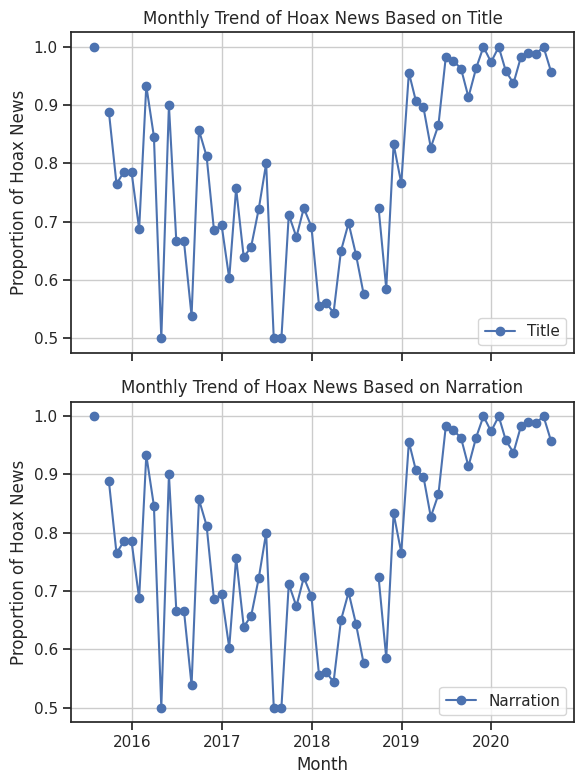

In [ ]:
import matplotlib.pyplot as plt

# Set 'tanggal' as the DataFrame index
dfjk = dfj.set_index('tanggal')
dfnk = dfn.set_index('tanggal')

# Resample the data on a monthly basis and calculate the mean
monthly_proportion_j = dfjk.resample('M')['label'].mean()
monthly_proportion_n = dfnk.resample('M')['label'].mean()

# Plotting the line chart with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

# Plotting for the first subplot
ax1.plot(monthly_proportion_j.index, monthly_proportion_j, marker='o', linestyle='-', label='Title')
ax1.set_title('Monthly Trend of Hoax News Based on Title')
ax1.set_ylabel('Proportion of Hoax News')
ax1.legend()
ax1.grid(True)

# Plotting for the second subplot
ax2.plot(monthly_proportion_n.index, monthly_proportion_n, marker='o', linestyle='-', label='Narration')
ax2.set_title('Monthly Trend of Hoax News Based on Narration')
ax2.set_xlabel('Month')
ax2.set_ylabel('Proportion of Hoax News')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


Dari line chart tersebut dibuat comparison apakah ada kecenderungan berita -berita semakin kesini semakin banyak yang memberitakan berita hoax. Comparison tersebut dilihat dari judul berita dan narasi berita itu sendiri. Hasilnya menunjukkan bahwa baik berdasarkan judul berita maupun narasi berita keduanya menunjukkan kecenderungan positif yang berarti **memang benar bahwa terdapat kecenderungan berita hoax semakin meningkat seiring waktu.**

In [ ]:
! pip install wordcloud

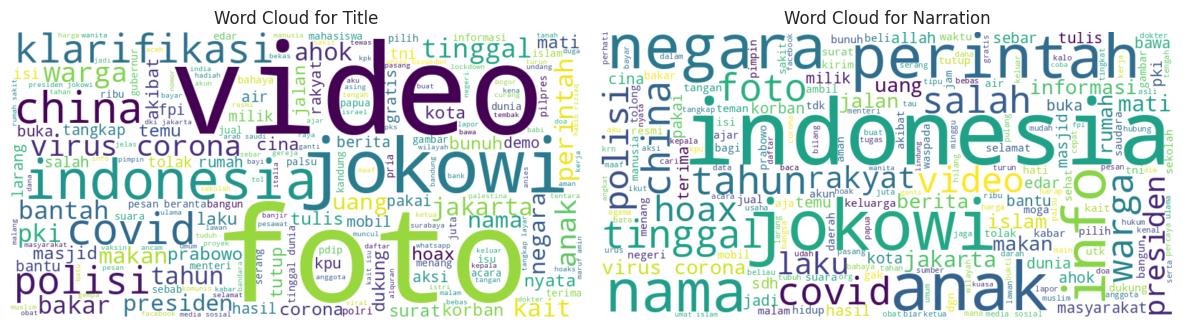

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming dfjk and dfnk are DataFrames with 'tanggal' as the index and 'title' and 'narration' columns
# Extracting text data from the title and narration columns
title_text = ' '.join(dfjk['cleaned_judul'].astype(str))
narration_text = ' '.join(dfnk['cleaned_narasi'].astype(str))

# Generate word clouds for title and narration
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(title_text)
wordcloud_narration = WordCloud(width=800, height=400, background_color='white').generate(narration_text)

# Plotting the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.title('Word Cloud for Title')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_narration, interpolation='bilinear')
plt.title('Word Cloud for Narration')
plt.axis('off')

plt.tight_layout()
plt.show()


 Lalu ingin dilihat kata apa yang memicu berita hoax tersebut. Dibuat lagi pembanding Dari interpretasi dengan wordcloud didapat beberapa kata yang memicu berita hoax tersebut. Kata-kata tersebut berupa:


- Jokowi
- Indonesia
- Foto
- Video
- Negara
- Perintah
- Warga
- Presiden
- China
- Jakarta
- Polisi
- Rakyat

Dari beberapa top words yang didapat terlihat bahwa kata yang paling sering muncul mengarah kepada pembahasan politik atau kenegaraan. Oleh karena itu hal ini dapat menjadi himbauan untuk pihak KOMINFO sebagai aturan penerbitan untuk melakukan seleksi berita yang lebih akurat sehingga berita yang dinilai hoax tidak menyebar dengan mudah. Dengan tertahannya berita hoax tersebut tentunya tersebarnya informasi-informasi yang salah dapat diminimalisir.






##Insight 3

Akan dilihat kata apa saja yang sering muncul pada berita dengan menggunakan LatentDirichletAllocation. Kemudian, kata tersebut akan dikelompokkan ke dalam topik-topik dengan kata yang paling sering muncul atau menonjol pada topik tersebut. Hal ini dilakukan agar mengetahui distribusi dari setiap topik yang nantinya juga dapat dilakukan untuk pemodelan.

In [ ]:
#CountVectorizer digunakan untuk menghasilkan representasi vektor dari teks dengan menghitung frekuensi kata dalam dokumen.
#Hal ini membantu dalam mempersiapkan data teks untuk analisis lebih lanjut atau pemodelan.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary = False, lowercase=True)
vsm = vectorizer.fit_transform(pd.concat([dfj['cleaned_judul'],dfn['cleaned_narasi']]))
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
print(vsm.shape) # Sama
print(vectorizer.vocabulary_)

(9402, 15644)
{'pakai': 10131, 'masker': 8455, 'sebab': 12425, 'sakit': 12123, 'legionnaires': 7790, 'instruksi': 5688, 'gubernur': 4732, 'jateng': 6003, 'tilang': 14329, 'muka': 9210, 'umum': 14818, 'etilang': 3977, 'via': 15017, 'apps': 758, 'pikobar': 10761, 'foto': 4250, 'jim': 6110, 'rohn': 11883, 'jokowi': 6167, 'presiden': 11112, 'baik': 1137, 'dlm': 3528, 'sejarah': 12489, 'bangsa': 1237, 'indonesia': 5528, 'politik': 10944, 'nyata': 9835, 'hasil': 4977, 'pulang': 11282, 'triliun': 14577, 'uang': 14734, 'negara': 9466, 'swiss': 13707, 'kadrun': 6309, 'kalo': 6380, 'panas': 10190, 'dingin': 3374, 'event': 3990, 'promo': 11190, 'smartphone': 13143, 'jne': 6136, 'spesial': 13324, 'juni': 6244, 'kuasa': 7460, 'negri': 9479, 'italia': 5839, 'menang': 8661, 'lahan': 7596, 'kubur': 7469, 'korban': 7306, 'corona': 2806, 'kapolres': 6458, 'timor': 14343, 'tengah': 14101, 'utara': 14954, 'nusa': 9805, 'tenggara': 14105, 'timur': 14346, 'klarifikasi': 7069, 'kait': 6336, 'video': 15022, '

In [ ]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
n_topics = 2
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(vsm)
lda

LatentDirichletAllocation(n_components=2, random_state=0)

In [ ]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(vsm)
print(vsm_topics.shape)
vsm_topics[:10]
# Ukuran kolom = #Topics ==> Dimension Reduction

(9402, 2)


array([[0.62859217, 0.37140783],
       [0.0956265 , 0.9043735 ],
       [0.0858683 , 0.9141317 ],
       [0.93262556, 0.06737444],
       [0.92045992, 0.07954008],
       [0.88558116, 0.11441884],
       [0.18382723, 0.81617277],
       [0.58037331, 0.41962669],
       [0.95830987, 0.04169013],
       [0.08674559, 0.91325441]])

100%|██████████| 9402/9402 [00:00<00:00, 387657.49it/s]


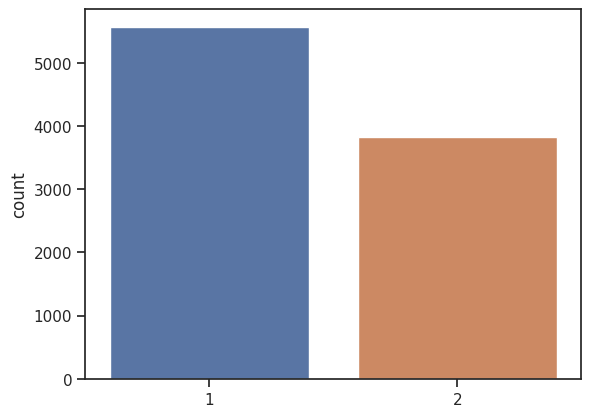

In [ ]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
p = sns.countplot(x=doc_topic)

Dari gambar di atas, terlihat bahwa plot tersebut menggambarkan distribusi topik di kata-kata yang ada pada data cleaned dari judul maupun narasi, dengan diasumsikan bahwa setiap kata memiliki satu topik utama yang diidentifikasi berdasarkan nilai skor topik terbesar.

In [ ]:
#
try:
  !pip install pandas==1.5.3
  import pyLDAvis
  import pyLDAvis.lda_model
  import pyLDAvis.gensim
  import pyLDAvis.gensim_models as gensimvis
  pyLDAvis.enable_notebook()
except:
  !pip install pyLDAvis
  import pyLDAvis
  import pyLDAvis.lda_model
  import pyLDAvis.gensim
  import pyLDAvis.gensim_models as gensimvis
  pyLDAvis.enable_notebook()
  !pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
#menampilkan plot dari LDA
pyLDAvis.lda_model.prepare(lda, vsm, vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.099654  0.0       1        1  57.808424
1     -0.099654  0.0       2        1  42.191576, topic_info=            Term        Freq       Total Category  logprob  loglift
14262        the  273.000000  273.000000  Default  30.0000  30.0000
2540       china  312.000000  312.000000  Default  29.0000  29.0000
5528   indonesia  726.000000  726.000000  Default  28.0000  28.0000
2622        cina  162.000000  162.000000  Default  27.0000  27.0000
5187        hoax  243.000000  243.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1625      berita  101.037182  246.066319   Topic2  -6.0730  -0.0272
9367        nama   98.206739  232.939412   Topic2  -6.1014  -0.0008
3697       dunia   86.891394  205.993442   Topic2  -6.2239  -0.0002
10942     polisi   88.857907  236.778144   Topic2  -6.2015  -0.1171
5917     jakarta   85.293128  278.325334   Topic2  -6.2424  -0.3197

[179 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
205        1  0.472572    ahok
205        2  0.526409    ahok
288        1  0.920778  akibat
288        2  0.081245  akibat
300        1  0.888174    aksi
...      ...       ...     ...
15043      1  0.864552   virus
15043      2  0.136232   virus
15190      1  0.666723   warga
15190      2  0.331291   warga
15350      2  0.981227    with

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

Interpretasi:

Dari visualisasi LDA di atas, dapat terlihat bahwa pada:
- topik 1 (lingkaran 1) memiliki sekitar 57.8% kata yang relevan dari data dikelompokkan pada topik 1. terdapat 30 kata yang relevan pada topik 1, di antaranya adalah foto, corona, jokowi, virus, covid, indonesia, masjid, islam, pki, surat, presiden, warga, klasifikasi, polisi, dan lain-lain. Kata-kata tersebut memiliki skor dari topik terbesar sehingga dikelompokkan menjadi topik utama, yaitu topik 1.

- topik 2 (lingkaran 2) memiliki sekitar 42.2% kata yang relevan dari data dikelompokkan pada topik 2. terdapat 30 kata yang relevan pada topik 2, di antaranya adalah indonesia, china, jokowi, presiden, negara, allah, islam, muslim, nama, gratis, ahok, dunia dan lain-lain. Kata-kata tersebut memiliki skor dari topik terbesar sehingga dikelompokkan menjadi topik utama, yaitu topik 2.

Oleh karena itu, dari pengelompokkan topik utama, yaitu topik 1 dan topik 2 dengan menggunakan LDA maka dihasilkan kata-kata yang sering muncul ataupun menonjol pada berita baik dari judul maupun narasinya, seperti presiden, corona, covid, jokowi, islam, masjid, dan lain sebagainya. Dengan membuat visualisasi seperti ini, diharapkan KOMINFO dapat memeriksa ataupun mensortir berita berita yang hoax maupun tidak hoax dari 30 kata yang paling sering muncul tersebut. Akan tetapi, akan lebih baik jika ditambahkan kolom saluran atau media seperti media internet, instagram, facebook, twitter, dan lain-lain. Hal ini akan membantu KOMINFO untuk lebih fokus ke saluran yang memiliki berita hoax sehingga dapat mencegah tersebarnya berita hoax tersebut dan juga lebih cepat untuk mengklarifikasikan berita hoax tersebut kepada masyarakat agar masyarakat tidak kemakan berita hoax.



##Insight 4

Dari insight 2, terdapat kecenderungan bahwa kata-kata yang muncul pada berita hoax mengarah pada pembahasan politik atau kenegaraan. Oleh karena itu, akan ditelaah lebih lanjut pada penjelasan berikut ini. Selanjutnya, akan dilihat apakah terdapat kata-kata tertentu yang mengindikasikan berita hoax pada masa sebelum dan sesudah pemilu? Jika iya, apakah kata tersebut mengacu pada jenis kata tertentu seperti nama tokoh, partai, capres, julukan, buzzer, dan lainnya?

In [ ]:
dfj = pd.concat([df['tanggal'], df[df['label']==1], data_judul['cleaned_judul']], axis=1)
print(dfj.info())
dfj.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tanggal           4525 non-null   datetime64[ns]
 1   ID                3850 non-null   float64       
 2   label             3850 non-null   float64       
 3   tanggal           3741 non-null   datetime64[ns]
 4   judul             3850 non-null   object        
 5   narasi            3850 non-null   object        
 6   nama file gambar  3850 non-null   object        
 7   tokenized_judul   3850 non-null   object        
 8   tokenized_narasi  3850 non-null   object        
 9   cleaned_judul     4701 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 367.4+ KB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,tanggal,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,cleaned_judul
0,2020-08-17,71.0,1.0,2020-08-17,pemakaian masker menyebabkan penyakit legionna...,caller to radio talk show recently shared th...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, to, radio, talk, show, recently, shar...",pakai masker sebab sakit legionnaires
1,2020-07-17,461.0,1.0,2020-07-17,instruksi gubernur jateng tentang penilangan b...,ythseluruh anggota grup sesuai instruksi guber...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[ythseluruh, anggota, grup, sesuai, instruksi,...",instruksi gubernur jateng tilang masker muka u...
2,2020-07-13,495.0,1.0,2020-07-13,foto jim rohn jokowi adalah presiden terbaik d...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[jokowi, adalah, presiden, terbaik, dlm, sejar...",foto jim rohn jokowi presiden baik dlm sejarah...
3,2020-07-08,550.0,1.0,2020-07-08,ini bukan politik tapi kenyataan pak jokowi be...,maaf mas dan mbak ini bukan politik tapi kenya...,550.png,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[maaf, mas, dan, mbak, ini, bukan, politik, ta...",politik nyata jokowi hasil pulang triliun uang...
4,2020-06-24,681.0,1.0,2020-06-24,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin]",foto kadrun kalo foto panas dingin


In [ ]:
hoax_keywords = ['heboh', 'palsu', 'fitnah', 'bohong', 'tidak benar', 'menyesatkan','geger','beredar','diduga','mungkin','isu','bocor','terungkap','mungkin']

def is_hoax(news_title):
    for keyword in hoax_keywords:
        if keyword in news_title.lower():
            return True
    return False

dfj['is_hoax'] = dfj['cleaned_judul'].apply(is_hoax)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
political_keywords = ['prabowo', 'jokowi', 'partai', 'pemilu', 'capres', 'buzzer','gubernur','megawati',
                      'banteng','camat','lurah','golkar','pdip','gerindra','RT','RW','presiden','wakil',
                      'DPR','MPR','DPD','politik','rakyat','periode','jabatan','kecurangan','hasil','adil',
                      'jujur','lanjut','walikota','cawapres','wapres','maruf','ekomomi','sektor','lembaga','sby','susilo',
                      'menteri','hukum']

def has_political_keywords(news_title):
    for keyword in political_keywords:
        if keyword in news_title.lower():
            return True
    return False

dfj['has_political_keywords'] = dfj['cleaned_judul'].apply(has_political_keywords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Melihat statistik
print(dfj['has_political_keywords'].value_counts())

# Melihat judul berita yang mengandung kata-kata politik
political_news = dfj[dfj['has_political_keywords'] == True]
print(political_news[['tanggal', 'cleaned_judul']])

False    3878
True      823
Name: has_political_keywords, dtype: int64
        tanggal    tanggal                                      cleaned_judul
1    2020-07-17 2020-07-17  instruksi gubernur jateng tilang masker muka u...
2    2020-07-13 2020-07-13  foto jim rohn jokowi presiden baik dlm sejarah...
3    2020-07-08 2020-07-08  politik nyata jokowi hasil pulang triliun uang...
7    2020-03-24 2020-03-24  foto presiden italia menang lahan kubur korban...
10   2019-10-13 2019-10-13                                 jokowi sedia undur
...         ...        ...                                                ...
4695 2018-07-14 2018-07-14  tulis partai komunis indonesia gambar senapan ...
4696 2018-06-27        NaT                                   banserpdip damai
4698 2020-04-01 2020-04-01  imigran china sengaja bawa virus tuju basmi ra...
4699 2019-03-05 2019-03-05                        bukti curang jokowi sembako
4700 2019-02-24 2019-02-24  anak sembunyi kolong meja temu presiden jok

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Bar Chart: Jumlah Kata pada has_political_keywords
keyword_counts = dfj['has_political_keywords'].value_counts()
fig_bar = px.bar(x=keyword_counts.index, y=keyword_counts.values,
                 labels={'x': 'has_political_keywords', 'y': 'Jumlah Kata'},
                 title='Jumlah Kata pada has_political_keywords')
fig_bar.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Dari visualisasi di atas, terlihat bahwa pada kolom judul terdapat kurang
lebih **800-1000 observasi** yang memiliki kata-kata pembahasan politik dan kenegaraan dari total 4701 observasi yang mengindikasikan adanya berita hoax. Selanjutnya, dari 800-1000 observasi tersebut akan dilakukan analisis lebih lanjut untuk mengetahui kata-kata yang sering muncul dan apakah mengacu pada jenis kata-kata tertentu pada pembahasan politik dan kenegaraan dari judul berita hoax tersebut.

In [ ]:
import pandas as pd
import plotly.express as px
from collections import Counter
from nltk.tokenize import word_tokenize
# Menentukan kata-kata pada berita yang memiliki has_political_keywords=True
political_news = dfj[dfj['has_political_keywords'] == True]['cleaned_judul']

# Tokenisasi dan menghitung frekuensi kata
all_words = [word.lower() for title in political_news for word in word_tokenize(title)]
word_freq = Counter(all_words)

# Mengambil 10 kata yang paling sering muncul
top_words = word_freq.most_common(10)

# Membuat DataFrame untuk bar chart
top_words_df = pd.DataFrame(top_words, columns=['Kata', 'Frekuensi'])

# Bar Chart: Kata-kata yang Paling Sering Muncul pada has_political_keywords=True
fig_bar = px.bar(top_words_df, x='Kata', y='Frekuensi', title='Kata-kata yang Paling Sering Muncul pada has_political_keywords')
fig_bar.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Interpretasi:

Dari bar chart tersebut, dapat terlihat bahwa kata yang paling sering muncul dan berkorelasi dengan pembahasan politik dan kenegaraan adalah **Jokowi, Presiden, dan Prabowo**. Kata-kata tersebut mengindikasikan berita hoax pada masa sebelum ataupun sesudah pemilu. Kemudian, kata tersebut juga mengacu pada jenis kata, yaitu nama tokoh (Jokowi dan Prabowo) dan lembaga (presiden) sebagai top 3 kata yang paling sering muncul pada pembahasan politik dan kenegaraan. Selain itu, dari gambar di atas terdapat kata hasil, indonesia, menteri, dukung, dan rakyat yang biasanya juga dipakai sebagai kata pada judul berita hoax serta berkorelasi atau ada hubungan dengan pembahasan politik dan kenegaraan. Selanjutnya, kata tersebut juga mengacu pada jenis kata, yaitu kenegaraan (Indonesia, menteri, dan rakyat) dan kata benda yang digunakan salah satunya pada pembahasan politik (hasil dan dukung).

Dari visualisasi bar chart di atas, berita hoax seringkali menggunakan kata jokowi, presiden, prabowo hingga rakyat untuk berita hoax terlebih pada masa sebelum atau sesudah pemilu. Oleh karena itu, diharapkan kepada KOMINFO untuk mengawasi berita-berita hoax pada pembahasan politik dan kenegaraan dari berita yang memakai kata tersebut serta memberikan **saksi tegas** terhadap media yang mengupload berita hoax tersebut karena tidak sesuai dengan syarat-syarat kelengkapan berita untuk ditampilkan. Selain itu, KOMINFO juga dapat membuat **AI atau teknologi** yang mendeteksi adanya hoax dari adanya penggunaan kata-kata tersebut pada berita yang tersebar di internet. Hal ini dilakukan agar meminimalisir adanya huru-hara, fitnah, ataupun keributan yang memancing masyarakat ataupun pihak yang dirugikan dalam masa sebelum atau sesudah pemilu.

